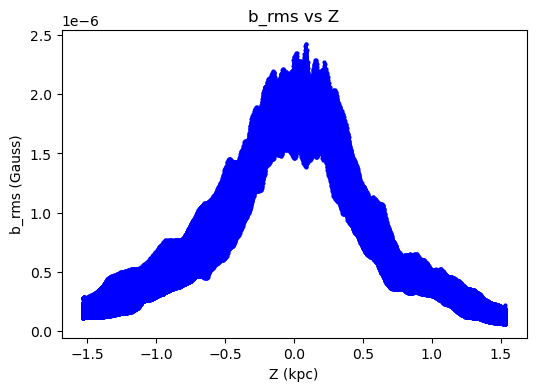

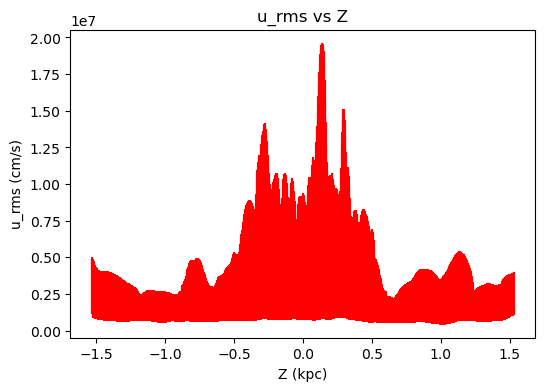

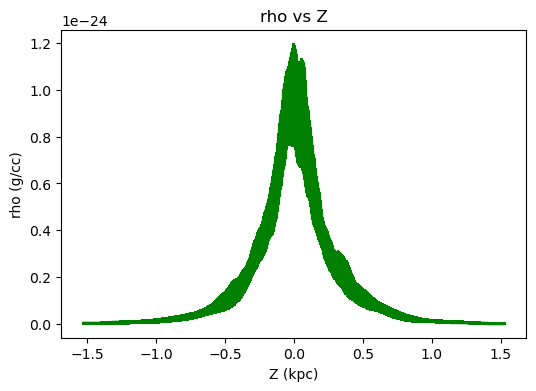

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


Time, Z, Brms, Urms, rho, Va = np.load('fred.npy')

# Plot Brms vs Z
plt.figure(figsize=(6, 4))
plt.plot(Z, Brms, label='Brms', color='b', marker='o', linestyle='--', linewidth=2, markersize=2)
plt.ylabel('b_rms (Gauss)')
plt.xlabel('Z (kpc)')
plt.title('b_rms vs Z')

plt.show()

# Plot Urms vs Z
plt.figure(figsize=(6, 4))
plt.plot(Z, Urms, label='Urms', color='r')
plt.ylabel('u_rms (cm/s)')
plt.xlabel('Z (kpc)')
plt.title('u_rms vs Z')

plt.show()

# Plot rho vs Z
plt.figure(figsize=(6, 4))
plt.plot(Z, rho, label='rho', color='g')
plt.ylabel('rho (g/cc)')
plt.xlabel('Z (kpc)')
plt.title('rho vs Z')

plt.show()

# # Plot Va vs Z
# plt.figure(figsize=(6, 4))
# plt.plot(Z, Va, label='Va', color='m')
# plt.ylabel('V_a (cm/s)')
# plt.xlabel('Z (kpc)')
# plt.title('V_a vs Z')
# plt.show()


In [2]:
print(np.shape(Time), np.shape(Z), np.shape(Brms), np.shape(Urms), np.shape(rho), np.shape(Va))


(306, 768) (306, 768) (306, 768) (306, 768) (306, 768) (306, 768)


Text(0.5, 1.0, 'rho vs Z')

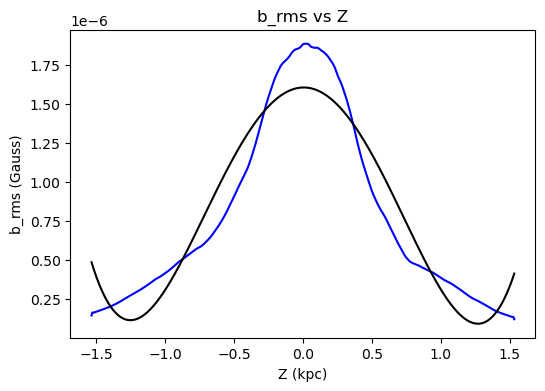

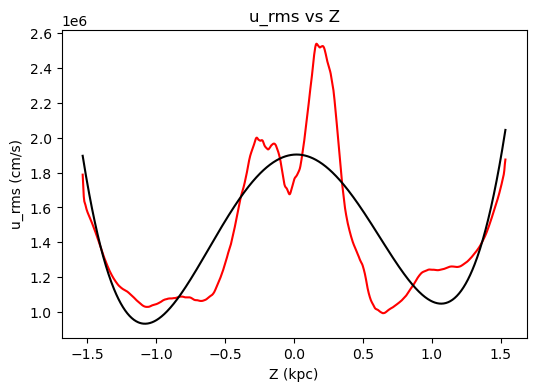

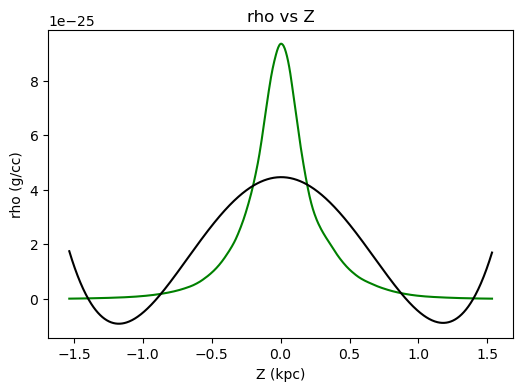

In [3]:

# Load the data
Time, Z, Brms, Urms, rho, Va = np.load('fred.npy')

# Take mean over time to get a 1D profile in Z
Brms_mean = np.mean(Brms, axis=0)
Urms_mean = np.mean(Urms, axis=0)
rho_mean = np.mean(rho, axis=0)

# Fit polynomials
Brms_fit = np.polyfit(Z[0, :], Brms_mean, 4)
Urms_fit = np.polyfit(Z[0, :], Urms_mean, 4)
rho_fit = np.polyfit(Z[0, :], rho_mean, 4)

# Generate polynomial functions
Brms_poly = np.poly1d(Brms_fit)
Urms_poly = np.poly1d(Urms_fit)
rho_poly = np.poly1d(rho_fit)

# Plot the fits
plt.figure(figsize=(6, 4))
plt.plot(Z[0, :], Brms_mean, label='Brms', color='b')
plt.plot(Z[0, :], Brms_poly(Z[0, :]), color='k')
plt.ylabel('b_rms (Gauss)')
plt.xlabel('Z (kpc)')
plt.title('b_rms vs Z')


plt.figure(figsize=(6, 4))
plt.plot(Z[0, :], Urms_mean, label='Urms', color='r')
plt.plot(Z[0, :], Urms_poly(Z[0, :]), color='k')
plt.ylabel('u_rms (cm/s)')
plt.xlabel('Z (kpc)')
plt.title('u_rms vs Z')


plt.figure(figsize=(6, 4))
plt.plot(Z[0, :], rho_mean, label='rho', color='g')
plt.plot(Z[0, :], rho_poly(Z[0, :]), color='k')
plt.ylabel('rho (g/cc)')
plt.xlabel('Z (kpc)')
plt.title('rho vs Z')






A = 1.7537425101428581e-06, mu = 0.01107918489329736, sigma = 0.5185102366161524


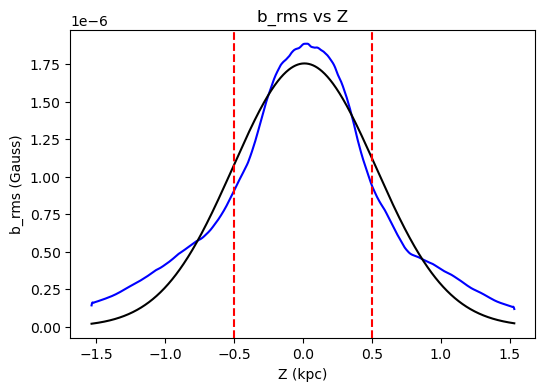

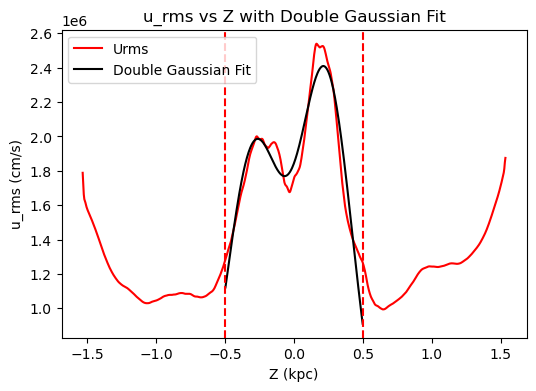

A1 = 2333819.1372232847, mu1 = 0.2296744946101868, sigma1 = 0.19543001493927345
A2 = 1905822.084679458, mu2 = -0.29015397432468837, sigma2 = -0.20140201561178298


In [4]:
# Define a Gaussian function
def gaussian(z, A, mu, sigma):
    return A * np.exp(-((z - mu) ** 2) / (2 * sigma ** 2))

# Fit the Gaussian to your data
popt, pcov = curve_fit(gaussian, Z[0, :], Brms_mean, p0=[1, 0, 1])

# Extract the best-fit parameters
A_fit, mu_fit, sigma_fit = popt

print(f"A = {A_fit}, mu = {mu_fit}, sigma = {sigma_fit}")
#plot the fit on top of the data
plt.figure(figsize=(6, 4))
plt.plot(Z[0, :], Brms_mean, label='Brms', color='b')
plt.plot(Z[0, :], gaussian(Z[0, :], A_fit, mu_fit, sigma_fit), color='k')
plt.ylabel('b_rms (Gauss)')
plt.xlabel('Z (kpc)')
plt.axvline(x=-0.5, color='r', linestyle='--')
plt.axvline(x=0.5, color='r', linestyle='--')
plt.title('b_rms vs Z')


#fit gaussian for Urms only in the range
mask = (Z[0, :] > -0.5) & (Z[0, :] < 0.5)
Z_masked = Z[0, :][mask]  # Correctly mask Z
Urms_masked = Urms_mean[mask]  # Correctly mask Urms_mean
A0 = np.max(Urms_masked)  # Peak value
mu0 = np.mean(Z_masked)   # Approximate center
sigma0 = np.std(Z_masked) # Width estimate
def double_gaussian(z, A1, mu1, sigma1, A2, mu2, sigma2):
    return (A1 * np.exp(-((z - mu1) ** 2) / (2 * sigma1 ** 2)) +
            A2 * np.exp(-((z - mu2) ** 2) / (2 * sigma2 ** 2)))

# Initial guesses based on peaks
A1_guess = np.max(Urms_masked)
mu1_guess = Z_masked[np.argmax(Urms_masked)]
sigma1_guess = np.std(Z_masked) / 2

A2_guess = A1_guess / 2
mu2_guess = mu1_guess + 0.2  # Slightly offset
sigma2_guess = sigma1_guess

p0_double = [A1_guess, mu1_guess, sigma1_guess, A2_guess, mu2_guess, sigma2_guess]

popt, _ = curve_fit(double_gaussian, Z_masked, Urms_masked, p0=p0_double, maxfev=10000)
A_fit1, mu_fit1, sigma_fit1, A_fit2, mu_fit2, sigma_fit2 = popt

# Plot the new fit
plt.figure(figsize=(6, 4))
plt.plot(Z[0, :], Urms_mean, label='Urms', color='r')
plt.plot(Z_masked, double_gaussian(Z_masked, *popt), color='k', label='Double Gaussian Fit')
plt.xlabel('Z (kpc)')
plt.ylabel('u_rms (cm/s)')
plt.legend()
plt.title('u_rms vs Z with Double Gaussian Fit')
plt.axvline(x=-0.5, color='r', linestyle='--')
plt.axvline(x=0.5, color='r', linestyle='--')
plt.show()
#print the fitting


print(f"A1 = {A_fit1}, mu1 = {mu_fit1}, sigma1 = {sigma_fit1}")
print(f"A2 = {A_fit2}, mu2 = {mu_fit2}, sigma2 = {sigma_fit2}")


Brms Fit: A = 1.7537425101428581e-06, mu = 0.01107918489329736, sigma = 0.5185102366161524


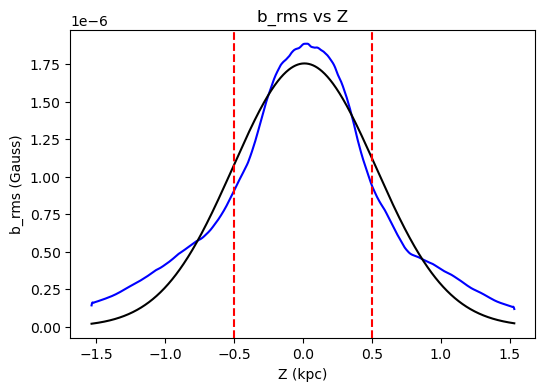

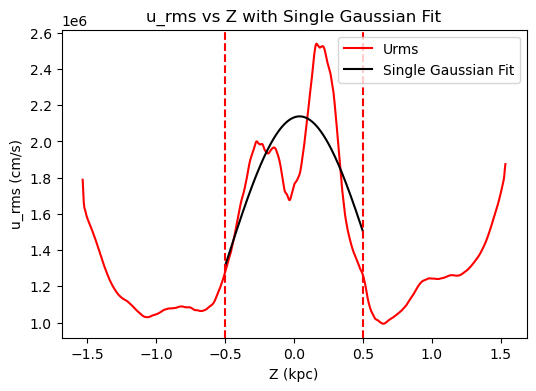

Urms Fit: A = 2138200.9021116053, mu = 0.040246312698495885, sigma = 0.5472449713460007


In [5]:
# Define a Gaussian function
def gaussian(z, A, mu, sigma):
    return A * np.exp(-((z - mu) ** 2) / (2 * sigma ** 2))

# Fit the Gaussian to Brms data
popt, pcov = curve_fit(gaussian, Z[0, :], Brms_mean, p0=[1, 0, 1])
A_fit, mu_fit, sigma_fit = popt
print(f"Brms Fit: A = {A_fit}, mu = {mu_fit}, sigma = {sigma_fit}")

# Plot Brms fit
plt.figure(figsize=(6, 4))
plt.plot(Z[0, :], Brms_mean, label='Brms', color='b')
plt.plot(Z[0, :], gaussian(Z[0, :], A_fit, mu_fit, sigma_fit), color='k')
plt.ylabel('b_rms (Gauss)')
plt.xlabel('Z (kpc)')
plt.axvline(x=-0.5, color='r', linestyle='--')
plt.axvline(x=0.5, color='r', linestyle='--')
plt.title('b_rms vs Z')
plt.show()

# Fit SINGLE Gaussian to Urms in range -0.5 to 0.5 kpc
mask = (Z[0, :] > -0.5) & (Z[0, :] < 0.5)
Z_masked = Z[0, :][mask]
Urms_masked = Urms_mean[mask]

# Initial guesses for single Gaussian
A0 = np.max(Urms_masked)
mu0 = Z_masked[np.argmax(Urms_masked)]
sigma0 = np.std(Z_masked)

# Fit single Gaussian
popt, _ = curve_fit(gaussian, Z_masked, Urms_masked, p0=[A0, mu0, sigma0])
A_fit, mu_fit, sigma_fit = popt

# Plot Urms fit
plt.figure(figsize=(6, 4))
plt.plot(Z[0, :], Urms_mean, label='Urms', color='r')
plt.plot(Z_masked, gaussian(Z_masked, A_fit, mu_fit, sigma_fit), 
         color='k', label='Single Gaussian Fit')
plt.xlabel('Z (kpc)')
plt.ylabel('u_rms (cm/s)')
plt.legend()
plt.title('u_rms vs Z with Single Gaussian Fit')
plt.axvline(x=-0.5, color='r', linestyle='--')
plt.axvline(x=0.5, color='r', linestyle='--')
plt.show()

print(f"Urms Fit: A = {A_fit}, mu = {mu_fit}, sigma = {sigma_fit}")


Text(0.5, 1.0, '$\\xi$ vs $z$')

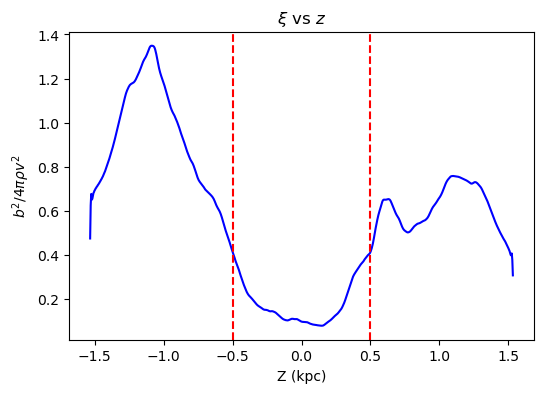

In [6]:
#plot b^2/4pi rho v^2 vs Z
plt.figure(figsize=(6, 4))
plt.plot(Z[0, :], Brms_mean**2/(4*np.pi*rho_mean*Urms_mean**2), label='b^2/4pi rho v^2', color='b')
plt.ylabel(r'$b^2/4\pi \rho v^2$')
plt.xlabel('Z (kpc)')
#lines at x=+-0.5
plt.axvline(x=-0.5, color='r', linestyle='--')
plt.axvline(x=0.5, color='r', linestyle='--')
# plt.ylim(0, 2)
plt.title(r'$\xi$ vs $z$')




Shape of Urms: (306, 768)


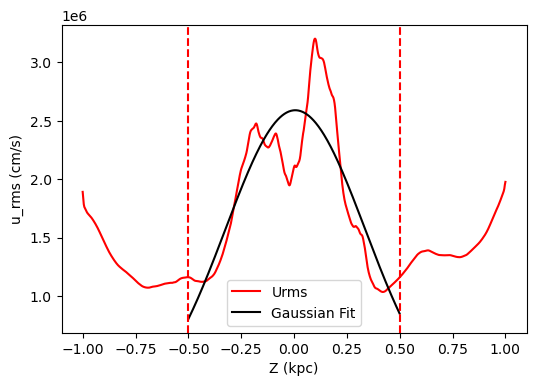

Fit: A = 2588637.35, μ = 0.01, σ = 0.33


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define Gaussian
def gaussian(z, A, mu, sigma):
    return A * np.exp(-((z - mu) ** 2) / (2 * sigma ** 2))

# Check shape of Urms
print("Shape of Urms:", np.shape(Urms))

# Case 1: Urms is a time × Z array (2D)
if np.ndim(Urms) == 2:
    Urms_mean = np.sqrt(np.mean(Urms**2, axis=0))  # RMS over time
    Z = np.linspace(-1, 1, len(Urms_mean))  # Define Z-axis

# Case 2: Urms is already a profile (1D)
elif np.ndim(Urms) == 1:
    Urms_mean = Urms
    Z = np.linspace(-1, 1, len(Urms_mean))

# Case 3: Urms is a scalar (error)
else:
    raise ValueError("Urms must be a 1D profile or 2D time × Z array!")

# Fit Gaussian in range -0.5 to 0.5 kpc
mask = (Z > -0.5) & (Z < 0.5)
Z_masked = Z[mask]
Urms_masked = Urms_mean[mask]

# Initial guesses
A0 = np.max(Urms_masked)
mu0 = Z_masked[np.argmax(Urms_masked)]
sigma0 = 0.2

# Fit
popt, _ = curve_fit(gaussian, Z_masked, Urms_masked, p0=[A0, mu0, sigma0])
A_fit, mu_fit, sigma_fit = popt

# Plot
plt.figure(figsize=(6, 4))
plt.plot(Z, Urms_mean, 'r-', label='Urms')
plt.plot(Z_masked, gaussian(Z_masked, *popt), 'k-', label='Gaussian Fit')
plt.axvline(x=-0.5, color='r', linestyle='--')
plt.axvline(x=0.5, color='r', linestyle='--')
plt.xlabel('Z (kpc)')
plt.ylabel('u_rms (cm/s)')
plt.legend()
plt.show()

print(f"Fit: A = {A_fit:.2f}, μ = {mu_fit:.2f}, σ = {sigma_fit:.2f}")


In [8]:
print("Shape of Urms:", np.shape(Urms))


Shape of Urms: (306, 768)


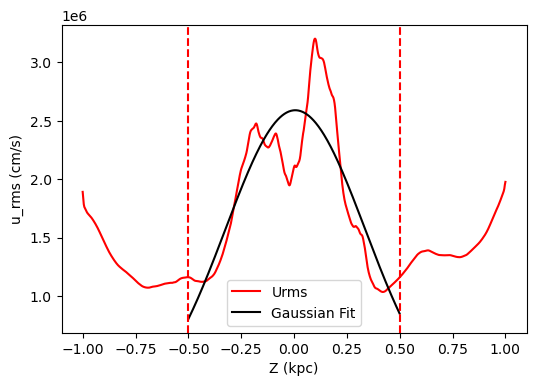

Fit: A = 2588637.35, μ = 0.01, σ = 0.33


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define Gaussian function
def gaussian(z, A, mu, sigma):
    return A * np.exp(-((z - mu) ** 2) / (2 * sigma ** 2))

# Example: Compute Urms_mean correctly (if Urms is time × Z)
Urms_mean = np.sqrt(np.mean(Urms**2, axis=0))  # RMS over time
Z = np.linspace(-1, 1, len(Urms_mean))  # Adjust Z if needed

# Fit Gaussian in range -0.5 to 0.5 kpc
mask = (Z > -0.5) & (Z < 0.5)
Z_masked = Z[mask]
Urms_masked = Urms_mean[mask]

# Initial guesses
A0 = np.max(Urms_masked)
mu0 = Z_masked[np.argmax(Urms_masked)]
sigma0 = 0.2

# Fit Gaussian
popt, _ = curve_fit(gaussian, Z_masked, Urms_masked, p0=[A0, mu0, sigma0])
A_fit, mu_fit, sigma_fit = popt

# Plot
plt.figure(figsize=(6, 4))
plt.plot(Z, Urms_mean, 'r-', label='Urms')
plt.plot(Z_masked, gaussian(Z_masked, *popt), 'k-', label='Gaussian Fit')
plt.axvline(x=-0.5, color='r', linestyle='--')
plt.axvline(x=0.5, color='r', linestyle='--')
plt.xlabel('Z (kpc)')
plt.ylabel('u_rms (cm/s)')
plt.legend()
plt.show()

print(f"Fit: A = {A_fit:.2f}, μ = {mu_fit:.2f}, σ = {sigma_fit:.2f}")


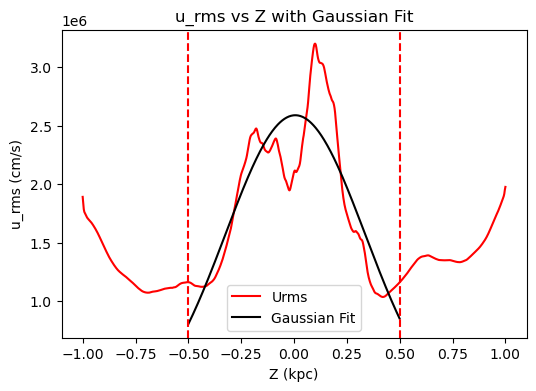

A = 2588637.351305794, mu = 0.0058751999449254255, sigma = 0.33061198450147156


In [10]:
# Fit Gaussian for Urms only in the range -0.5 to 0.5 kpc
mask = (Z > -0.5) & (Z < 0.5)
Z_masked = Z[mask]
Urms_mean = np.sqrt(np.mean(Urms**2, axis=0))  # Mean over time
Urms_masked = Urms_mean[mask]

# Initial guesses based on data
A0 = np.max(Urms_masked)  # Peak value
mu0 = Z_masked[np.argmax(Urms_masked)]  # Position of peak
sigma0 = 0.2  # Initial guess for width (adjust if needed)

# Fit single Gaussian
popt, pcov = curve_fit(gaussian, Z_masked, Urms_masked, p0=[A0, mu0, sigma0])

# Extract the best-fit parameters
A_fit, mu_fit, sigma_fit = popt

# Plot the fit
plt.figure(figsize=(6, 4))
plt.plot(Z, Urms_mean, label='Urms', color='r')
plt.plot(Z_masked, gaussian(Z_masked, A_fit, mu_fit, sigma_fit), 
         color='k', label='Gaussian Fit')
plt.xlabel('Z (kpc)')
plt.ylabel('u_rms (cm/s)')
plt.legend()
plt.title('u_rms vs Z with Gaussian Fit')
plt.axvline(x=-0.5, color='r', linestyle='--')
plt.axvline(x=0.5, color='r', linestyle='--')
plt.show()

# Print the fitting parameters
print(f"A = {A_fit}, mu = {mu_fit}, sigma = {sigma_fit}")


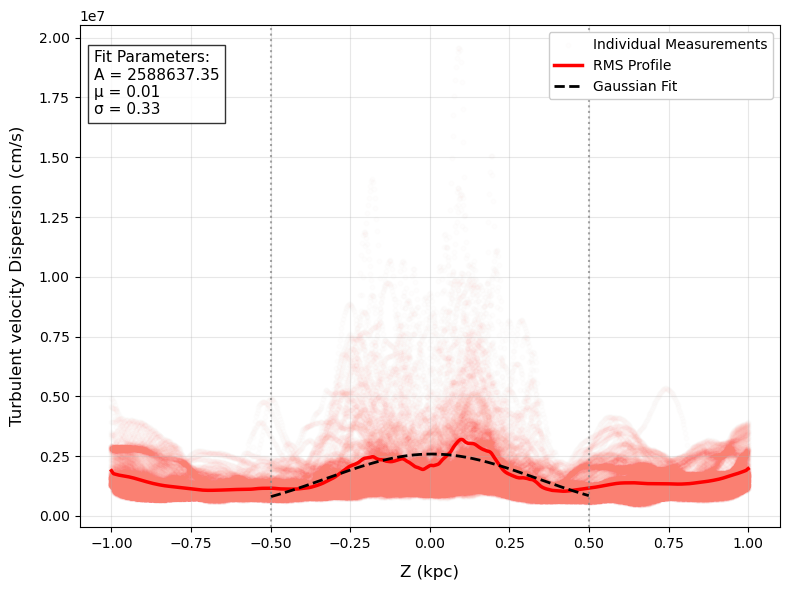

Fit Parameters:
Amplitude (A) = 2588637.35 cm/s
Center (μ) = 0.01 kpc
Width (σ) = 0.33 kpc


In [11]:
# Fit Gaussian for Urms in range -0.5 to 0.5 kpc
mask = (Z > -0.5) & (Z < 0.5)
Z_masked = Z[mask]
Urms_mean = np.sqrt(np.mean(Urms**2, axis=0))  # RMS over time
Urms_masked = Urms_mean[mask]

# Initial guesses
A0 = np.max(Urms_masked)
mu0 = Z_masked[np.argmax(Urms_masked)]
sigma0 = 0.2

# Fit single Gaussian
popt, pcov = curve_fit(gaussian, Z_masked, Urms_masked, p0=[A0, mu0, sigma0])
A_fit, mu_fit, sigma_fit = popt

# Create figure with professional styling
plt.figure(figsize=(8, 6), dpi=100)
plt.style.use('default')  # Using default style which always exists

# Plot all individual Urms measurements as faint points
for i in range(Urms.shape[0]):  # Loop through all time points
    plt.scatter(Z, Urms[i,:], color='salmon', alpha=0.01, s=10, 
               label='Individual Measurements' if i==0 else "")

# Plot the mean Urms profile
plt.plot(Z, Urms_mean, 'r-', linewidth=2.5, label='RMS Profile')

# Plot the Gaussian fit
plt.plot(Z_masked, gaussian(Z_masked, A_fit, mu_fit, sigma_fit), 
         'k--', linewidth=2, label='Gaussian Fit')

# Add vertical boundaries
plt.axvline(x=-0.5, color='gray', linestyle=':', alpha=0.7)
plt.axvline(x=0.5, color='gray', linestyle=':', alpha=0.7)

# Formatting
plt.xlabel('Z (kpc)', fontsize=12, labelpad=10)
plt.ylabel('Turbulent velocity Dispersion (cm/s)', fontsize=12, labelpad=10)
# plt.title('Turbulent Velocity Profile with Gaussian Fit', fontsize=14, pad=15)

# Add fit parameters to plot
fit_text = f'Fit Parameters:\nA = {A_fit:.2f}\nμ = {mu_fit:.2f}\nσ = {sigma_fit:.2f}'
plt.text(0.02, 0.95, fit_text, transform=plt.gca().transAxes,
         fontsize=11, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.8))

# Legend and final touches
plt.legend(loc='upper right', framealpha=1)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Fit Parameters:\nAmplitude (A) = {A_fit:.2f} cm/s\nCenter (μ) = {mu_fit:.2f} kpc\nWidth (σ) = {sigma_fit:.2f} kpc")


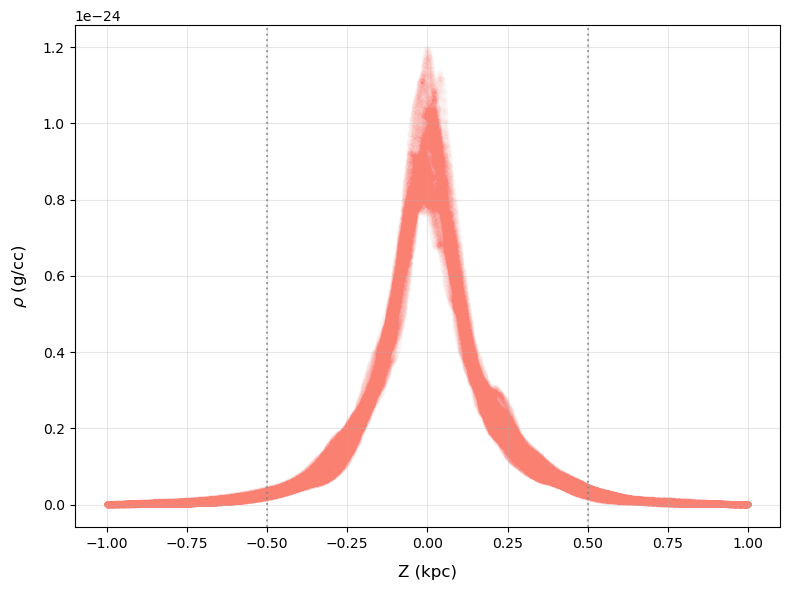

Fit Parameters:
Amplitude (A) = 0.00 cm/s
Center (μ) = 0.00 kpc
Width (σ) = 0.24 kpc


In [12]:
# Fit Gaussian for Urms in range -0.5 to 0.5 kpc
mask = (Z > -0.5) & (Z < 0.5)
Z_masked = Z[mask]
rho_mean_new = np.sqrt(np.mean(rho, axis=0))  # RMS over time
rho_masked = rho_mean_new[mask]

# Initial guesses
A0 = np.max(rho_masked)
mu0 = Z_masked[np.argmax(rho_masked)]
sigma0 = 0.5*(np.max(Z_masked) - np.min(Z_masked))/4

# Fit single Gaussian
popt, pcov = curve_fit(gaussian, Z_masked, rho_masked, p0=[A0, mu0, sigma0])
A_fit, mu_fit, sigma_fit = popt

# Create figure with professional styling
plt.figure(figsize=(8, 6), dpi=100)
plt.style.use('default')  # Using default style which always exists

# Plot all individual Urms measurements as faint points
for i in range(rho.shape[0]):  # Loop through all time points
    plt.scatter(Z, rho[i,:], color='salmon', alpha=0.01, s=10, 
               label='Individual Measurements' if i==0 else "")

# Plot the mean rho profile
# plt.plot(Z, rho_mean_new, 'r-', linewidth=2.5, label='RMS Profile')

# # Plot the Gaussian fit
# plt.plot(Z_masked, gaussian(Z_masked, A_fit, mu_fit, sigma_fit), 
#          'k--', linewidth=2, label='Gaussian Fit')

# Add vertical boundaries
plt.axvline(x=-0.5, color='gray', linestyle=':', alpha=0.7)
plt.axvline(x=0.5, color='gray', linestyle=':', alpha=0.7)

# Formatting
plt.xlabel('Z (kpc)', fontsize=12, labelpad=10)
plt.ylabel(r'$\rho$ (g/cc)', fontsize=12, labelpad=10)
# plt.title('Turbulent Velocity Profile with Gaussian Fit', fontsize=14, pad=15)

# Add fit parameters to plot
# fit_text = f'Fit Parameters:\nA = {A_fit:.2f}\nμ = {mu_fit:.2f}\nσ = {sigma_fit:.2f}'
# plt.text(0.02, 0.95, fit_text, transform=plt.gca().transAxes,
#          fontsize=11, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.8))

# Legend and final touches
# plt.legend(loc='upper right', framealpha=1)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Fit Parameters:\nAmplitude (A) = {A_fit:.2f} cm/s\nCenter (μ) = {mu_fit:.2f} kpc\nWidth (σ) = {sigma_fit:.2f} kpc")


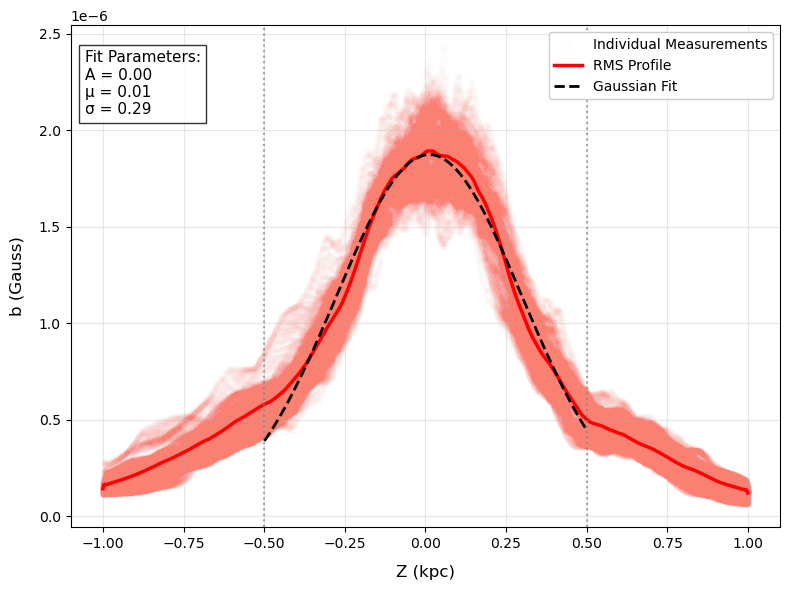

Fit Parameters:
Amplitude (A) = 0.00 cm/s
Center (μ) = 0.01 kpc
Width (σ) = 0.29 kpc


In [13]:
# Fit Gaussian for Urms in range -0.5 to 0.5 kpc
mask = (Z > -0.5) & (Z < 0.5)
Z_masked = Z[mask]
Brms_mean = np.sqrt(np.mean(Brms**2, axis=0))  # RMS over time
Brms_masked = Brms_mean[mask]

# Initial guesses
A0 = np.max(Brms_masked)
mu0 = Z_masked[np.argmax(Brms_masked)]
sigma0 = 0.2

# Fit single Gaussian
popt, pcov = curve_fit(gaussian, Z_masked, Brms_masked, p0=[A0, mu0, sigma0])
A_fit, mu_fit, sigma_fit = popt

# Create figure with professional styling
plt.figure(figsize=(8, 6), dpi=100)
plt.style.use('default')  # Using default style which always exists

# Plot all individual Urms measurements as faint points
for i in range(Brms.shape[0]):  # Loop through all time points
    plt.scatter(Z, Brms[i,:], color='salmon', alpha=0.01, s=10, 
               label='Individual Measurements' if i==0 else "")

# Plot the mean Brms profile
plt.plot(Z, Brms_mean, 'r-', linewidth=2.5, label='RMS Profile')

# Plot the Gaussian fit
plt.plot(Z_masked, gaussian(Z_masked, A_fit, mu_fit, sigma_fit), 
         'k--', linewidth=2, label='Gaussian Fit')

# Add vertical boundaries
plt.axvline(x=-0.5, color='gray', linestyle=':', alpha=0.7)
plt.axvline(x=0.5, color='gray', linestyle=':', alpha=0.7)

# Formatting
plt.xlabel('Z (kpc)', fontsize=12, labelpad=10)
plt.ylabel('b (Gauss)', fontsize=12, labelpad=10)
# plt.title('Turbulent Velocity Profile with Gaussian Fit', fontsize=14, pad=15)

# Add fit parameters to plot
fit_text = f'Fit Parameters:\nA = {A_fit:.2f}\nμ = {mu_fit:.2f}\nσ = {sigma_fit:.2f}'
plt.text(0.02, 0.95, fit_text, transform=plt.gca().transAxes,
         fontsize=11, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.8))

# Legend and final touches
plt.legend(loc='upper right', framealpha=1)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Fit Parameters:\nAmplitude (A) = {A_fit:.2f} cm/s\nCenter (μ) = {mu_fit:.2f} kpc\nWidth (σ) = {sigma_fit:.2f} kpc")


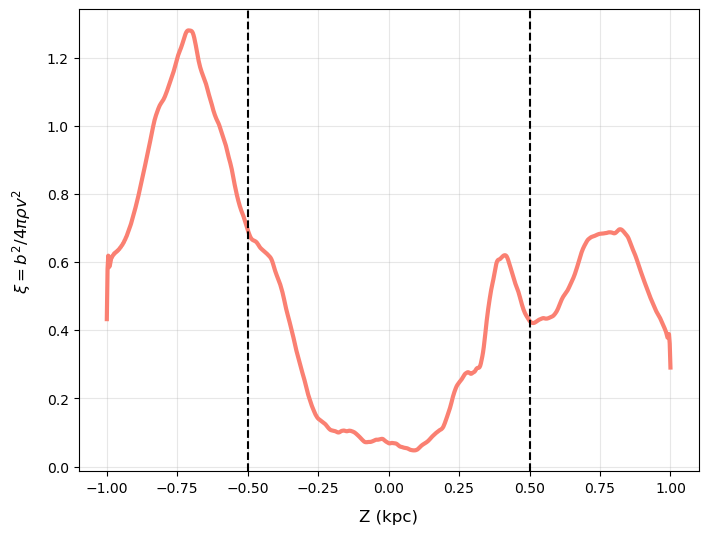

In [14]:
#plot xi=b^2/4pi rho v^2 vs Z
plt.figure(figsize=(8, 6 ), dpi=100)

plt.plot(Z, Brms_mean**2/(4*np.pi*rho_mean*Urms_mean**2), label='b^2/4pi rho v^2', color='salmon', linewidth=3)
plt.ylabel(r'$\xi=b^2/4\pi \rho v^2$', fontsize=12, labelpad=10)
plt.xlabel('Z (kpc)', fontsize=12, labelpad=10)

#lines at x=+-0.5
plt.axvline(x=-0.5, color='black', linestyle='--')
plt.axvline(x=0.5, color='black', linestyle='--')
# plt.title(r'$\xi$ vs $z$')
plt.grid(True, alpha=0.3)
plt.show()



/tmp/ipykernel_52607/301033956.py:18: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


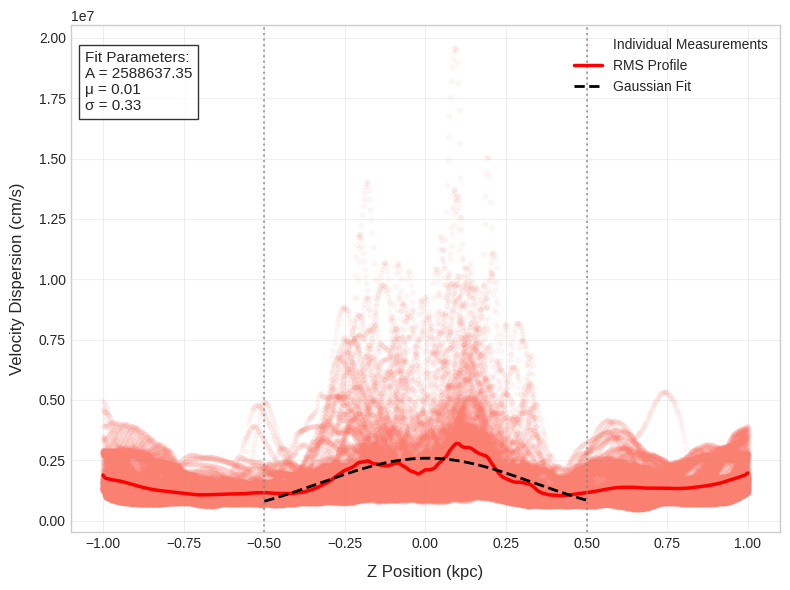

Fit Parameters:
Amplitude (A) = 2588637.35 cm/s
Center (μ) = 0.01 kpc
Width (σ) = 0.33 kpc


In [15]:
# Fit Gaussian for Urms in range -0.5 to 0.5 kpc
mask = (Z > -0.5) & (Z < 0.5)
Z_masked = Z[mask]
Urms_mean = np.sqrt(np.mean(Urms**2, axis=0))  # RMS over time
Urms_masked = Urms_mean[mask]

# Initial guesses
A0 = np.max(Urms_masked)
mu0 = Z_masked[np.argmax(Urms_masked)]
sigma0 = 0.2

# Fit single Gaussian
popt, pcov = curve_fit(gaussian, Z_masked, Urms_masked, p0=[A0, mu0, sigma0])
A_fit, mu_fit, sigma_fit = popt

# Create figure with professional styling
plt.figure(figsize=(8, 6), dpi=100)
plt.style.use('seaborn-whitegrid')

# Plot all individual Urms measurements as faint points
for i in range(Urms.shape[0]):  # Loop through all time points
    plt.scatter(Z, Urms[i,:], color='salmon', alpha=0.05, s=10, label='Individual Measurements' if i==0 else "")

# Plot the mean Urms profile
plt.plot(Z, Urms_mean, 'r-', linewidth=2.5, label='RMS Profile')

# Plot the Gaussian fit
plt.plot(Z_masked, gaussian(Z_masked, A_fit, mu_fit, sigma_fit), 
         'k--', linewidth=2, label='Gaussian Fit')

# Add vertical boundaries
plt.axvline(x=-0.5, color='gray', linestyle=':', alpha=0.7)
plt.axvline(x=0.5, color='gray', linestyle=':', alpha=0.7)

# Formatting
plt.xlabel('Z Position (kpc)', fontsize=12, labelpad=10)
plt.ylabel('Velocity Dispersion (cm/s)', fontsize=12, labelpad=10)
# plt.title('Turbulent Velocity Profile with Gaussian Fit', fontsize=14, pad=15)

# Add fit parameters to plot
fit_text = f'Fit Parameters:\nA = {A_fit:.2f}\nμ = {mu_fit:.2f}\nσ = {sigma_fit:.2f}'
plt.text(0.02, 0.95, fit_text, transform=plt.gca().transAxes,
         fontsize=11, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.8))

# Legend and final touches
plt.legend(loc='upper right', framealpha=1)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Fit Parameters:\nAmplitude (A) = {A_fit:.2f} cm/s\nCenter (μ) = {mu_fit:.2f} kpc\nWidth (σ) = {sigma_fit:.2f} kpc")


/tmp/ipykernel_52607/888061582.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


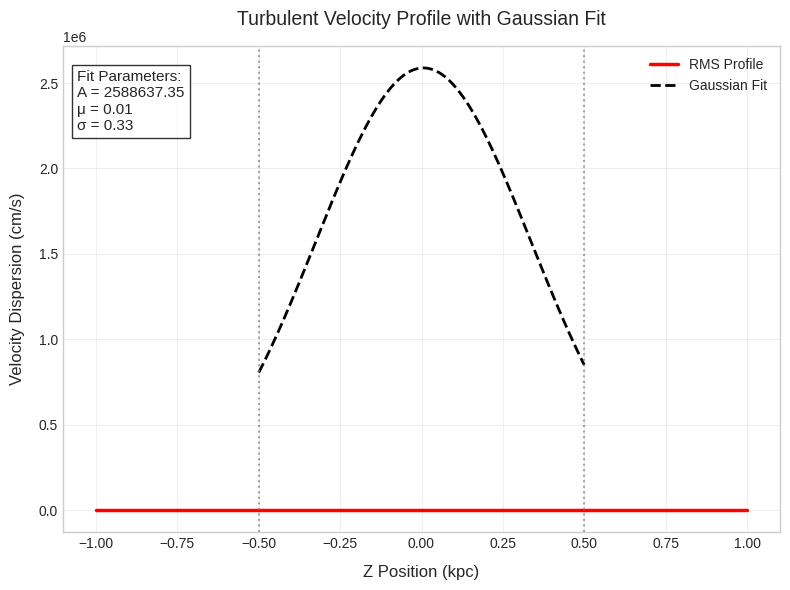

Fit Parameters:
Amplitude (A) = 2588637.35 cm/s
Center (μ) = 0.01 kpc
Width (σ) = 0.33 kpc


In [16]:


# Create figure with professional styling
plt.figure(figsize=(8, 6), dpi=100)
plt.style.use('seaborn-whitegrid')

# Plot the mean Urms profile
plt.plot(Z, Brms_mean**2/Urms_mean**2, 'r-', linewidth=2.5, label='RMS Profile')

# Plot the Gaussian fit
plt.plot(Z_masked, gaussian(Z_masked, A_fit, mu_fit, sigma_fit), 
         'k--', linewidth=2, label='Gaussian Fit')

# Add vertical boundaries
plt.axvline(x=-0.5, color='gray', linestyle=':', alpha=0.7)
plt.axvline(x=0.5, color='gray', linestyle=':', alpha=0.7)

# Formatting
plt.xlabel('Z Position (kpc)', fontsize=12, labelpad=10)
plt.ylabel('Velocity Dispersion (cm/s)', fontsize=12, labelpad=10)
plt.title('Turbulent Velocity Profile with Gaussian Fit', fontsize=14, pad=15)

# Add fit parameters to plot
fit_text = f'Fit Parameters:\nA = {A_fit:.2f}\nμ = {mu_fit:.2f}\nσ = {sigma_fit:.2f}'
plt.text(0.02, 0.95, fit_text, transform=plt.gca().transAxes,
         fontsize=11, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.8))

# Legend and final touches
plt.legend(loc='upper right', framealpha=1)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Fit Parameters:\nAmplitude (A) = {A_fit:.2f} cm/s\nCenter (μ) = {mu_fit:.2f} kpc\nWidth (σ) = {sigma_fit:.2f} kpc")


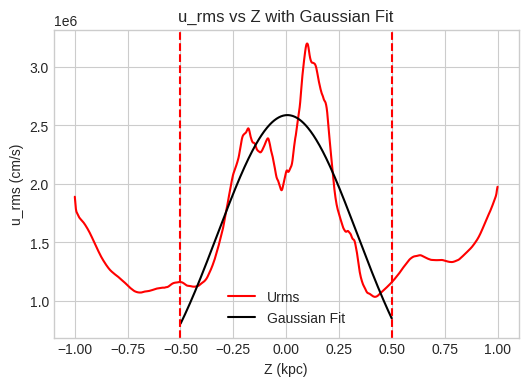

A = 2588637.35, mu = 0.01, sigma = 0.33


In [17]:
# Fit Gaussian for Urms only in the range -0.5 to 0.5 kpc
mask = (Z > -0.5) & (Z < 0.5)  # Removed [0,:] since Z is 1D
Z_masked = Z[mask]
Urms_masked = Urms_mean[mask]

# Initial guesses based on data
A0 = np.max(Urms_masked)  # Peak value
mu0 = Z_masked[np.argmax(Urms_masked)]  # Position of peak
sigma0 = 0.2  # Initial guess for width (adjust if needed)

# Fit single Gaussian
popt, pcov = curve_fit(gaussian, Z_masked, Urms_masked, p0=[A0, mu0, sigma0])

# Extract the best-fit parameters
A_fit, mu_fit, sigma_fit = popt

# Plot the fit
plt.figure(figsize=(6, 4))
plt.plot(Z, Urms_mean, label='Urms', color='r')
plt.plot(Z_masked, gaussian(Z_masked, A_fit, mu_fit, sigma_fit), 
         color='k', label='Gaussian Fit')
plt.xlabel('Z (kpc)')
plt.ylabel('u_rms (cm/s)')
plt.legend()
plt.title('u_rms vs Z with Gaussian Fit')
plt.axvline(x=-0.5, color='r', linestyle='--')
plt.axvline(x=0.5, color='r', linestyle='--')
plt.show()

# Print the fitting parameters
print(f"A = {A_fit:.2f}, mu = {mu_fit:.2f}, sigma = {sigma_fit:.2f}")


Shape of Z: (768,)
Shape of Urms_mean: (768,)


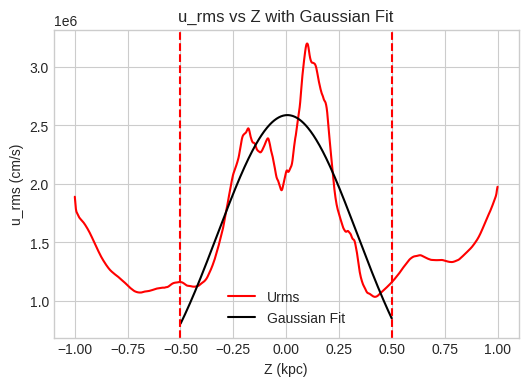

A = 2588637.35, mu = 0.01, sigma = 0.33


In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define Gaussian function
def gaussian(z, A, mu, sigma):
    return A * np.exp(-((z - mu) ** 2) / (2 * sigma ** 2))

# Check shapes
print("Shape of Z:", np.shape(Z))
print("Shape of Urms_mean:", np.shape(Urms_mean))

# Ensure Z and Urms_mean are 1D arrays of the same length
Z = np.asarray(Z).flatten()  # Force 1D
Urms_mean = np.asarray(Urms_mean).flatten()  # Force 1D

# Fit Gaussian for Urms only in the range -0.5 to 0.5 kpc
mask = (Z > -0.5) & (Z < 0.5)
Z_masked = Z[mask]
Urms_masked = Urms_mean[mask]

# Initial guesses based on data
A0 = np.max(Urms_masked)  # Peak value
mu0 = Z_masked[np.argmax(Urms_masked)]  # Position of peak
sigma0 = 0.2  # Initial guess for width (adjust if needed)

# Fit single Gaussian
popt, pcov = curve_fit(gaussian, Z_masked, Urms_masked, p0=[A0, mu0, sigma0])

# Extract the best-fit parameters
A_fit, mu_fit, sigma_fit = popt

# Plot the fit
plt.figure(figsize=(6, 4))
plt.plot(Z, Urms_mean, label='Urms', color='r')
plt.plot(Z_masked, gaussian(Z_masked, A_fit, mu_fit, sigma_fit), 
         color='k', label='Gaussian Fit')
plt.xlabel('Z (kpc)')
plt.ylabel('u_rms (cm/s)')
plt.legend()
plt.title('u_rms vs Z with Gaussian Fit')
plt.axvline(x=-0.5, color='r', linestyle='--')
plt.axvline(x=0.5, color='r', linestyle='--')
plt.show()

# Print the fitting parameters
print(f"A = {A_fit:.2f}, mu = {mu_fit:.2f}, sigma = {sigma_fit:.2f}")


<>:50: SyntaxWarning: invalid escape sequence '\m'
<>:51: SyntaxWarning: invalid escape sequence '\s'
<>:50: SyntaxWarning: invalid escape sequence '\m'
<>:51: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_52607/1050375766.py:50: SyntaxWarning: invalid escape sequence '\m'
  f'$\mu = {popt[1]:.2f}$\n'
/tmp/ipykernel_52607/1050375766.py:51: SyntaxWarning: invalid escape sequence '\s'
  f'$\sigma = {popt[2]:.2f}$')
/usr/lib/python3/dist-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


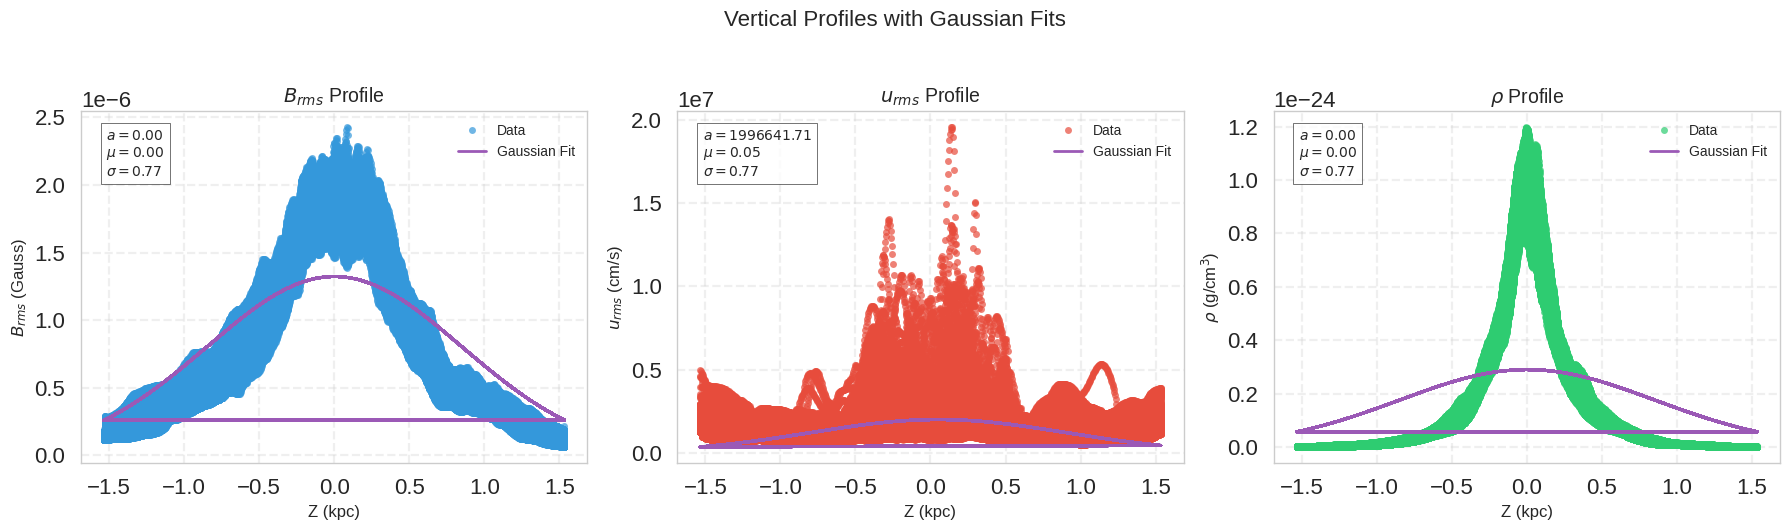

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Load data
Time, Z, Brms, Urms, rho, Va = np.load('fred.npy')

# Ensure 1D arrays
Z, Brms, Urms, rho = [arr.flatten() for arr in [Z, Brms, Urms, rho]]

# Define Gaussian function
def gaussian(x, a, b, c):
    """Gaussian function with amplitude a, mean b, and width c"""
    return a * np.exp(-((x - b)**2) / (2 * 0.85**2))

# Set up plot style
plt.style.use('seaborn-v0_8-poster')
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.3
plt.rcParams['grid.linestyle'] = '--'

# Create figure with subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Vertical Profiles with Gaussian Fits', fontsize=16, y=1.05)

# Custom color palette
colors = {
    'Brms': '#3498db',
    'Urms': '#e74c3c',
    'rho': '#2ecc71',
    'fit': '#9b59b6'
}

# Function to plot with Gaussian fit
def plot_with_fit(ax, x, y, color, title, ylabel, fit_color):
    try:
        # Initial parameter guesses
        p0 = [np.max(y), np.median(x), (np.max(x)-np.min(x))/4]
        
        # Fit Gaussian
        popt, pcov = curve_fit(gaussian, x, y, p0=p0, maxfev=5000)
        
        # Plot data and fit
        ax.plot(x, y, 'o', color=color, markersize=5, alpha=0.7, label='Data')
        ax.plot(x, gaussian(x, *popt), '-', color=fit_color, 
                linewidth=2, label='Gaussian Fit')
        
        # Add fit parameters
        text = (f'$a = {popt[0]:.2f}$\n'
                f'$\mu = {popt[1]:.2f}$\n'
                f'$\sigma = {popt[2]:.2f}$')
        ax.text(0.05, 0.95, text, transform=ax.transAxes,
                fontsize=10, va='top', ha='left',
                bbox=dict(facecolor='white', alpha=0.8))
        
    except Exception as e:
        print(f"Could not fit {title}: {str(e)}")
        ax.plot(x, y, 'o', color=color, markersize=5, alpha=0.7, label='Data (no fit)')
    
    ax.set_title(title, fontsize=14)
    ax.set_ylabel(ylabel, fontsize=12)
    ax.set_xlabel('Z (kpc)', fontsize=12)
    ax.legend(fontsize=10, framealpha=1)

# Plot each profile
plot_with_fit(ax1, Z, Brms, colors['Brms'], r'$B_{rms}$ Profile', 
              r'$B_{rms}$ (Gauss)', colors['fit'])
plot_with_fit(ax2, Z, Urms, colors['Urms'], r'$u_{rms}$ Profile', 
              r'$u_{rms}$ (cm/s)', colors['fit'])
plot_with_fit(ax3, Z, rho, colors['rho'], r'$\rho$ Profile', 
              r'$\rho$ (g/cm$^3$)', colors['fit'])

# Adjust layout
plt.tight_layout()

# Save figure
plt.savefig('vertical_profiles_with_fits.png', dpi=300, bbox_inches='tight')
plt.show()


/tmp/ipykernel_52607/2290314839.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-paper')


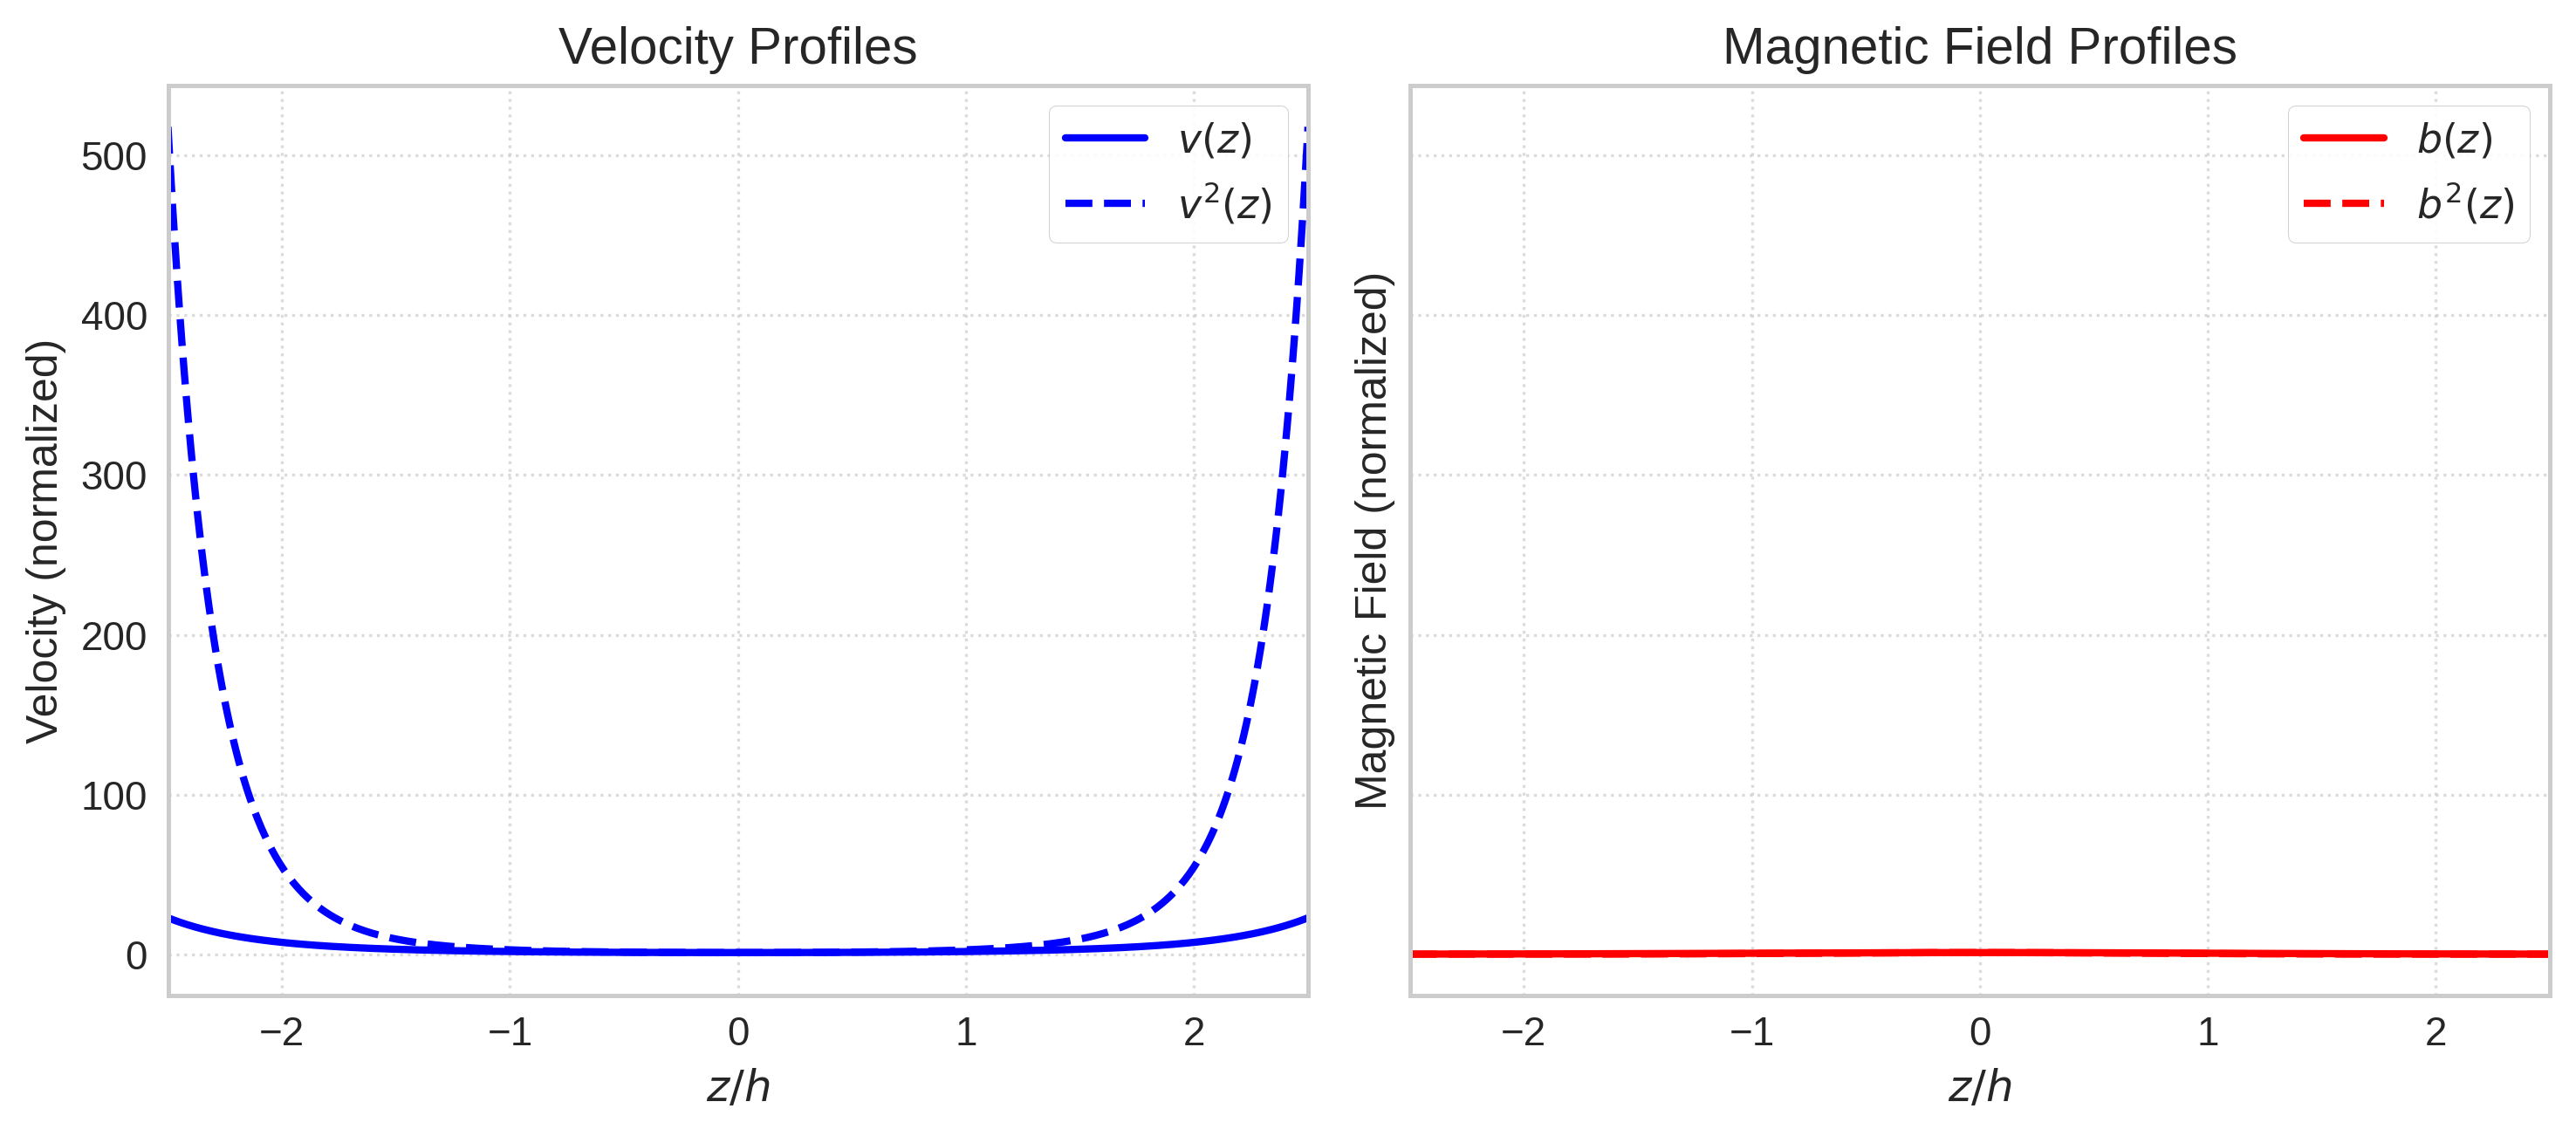

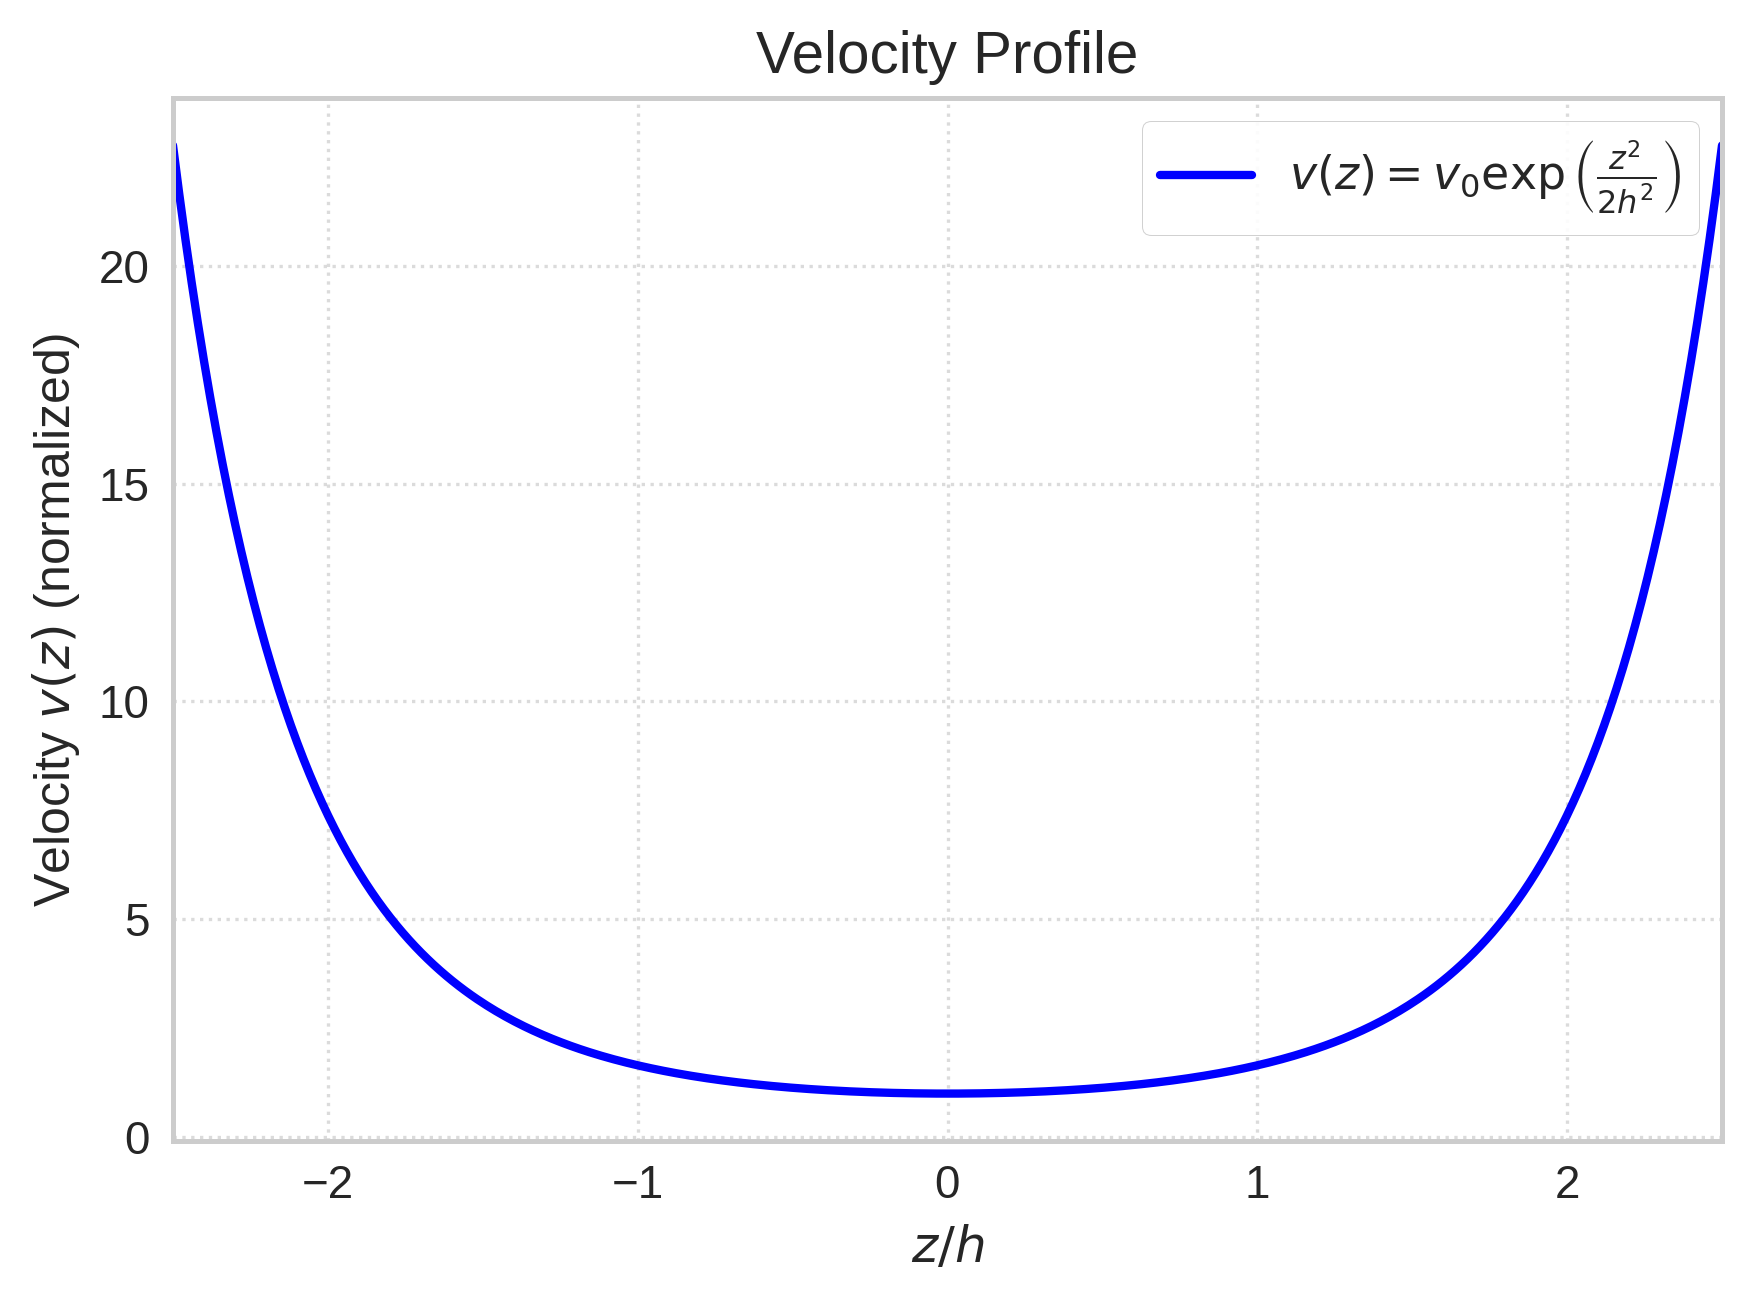

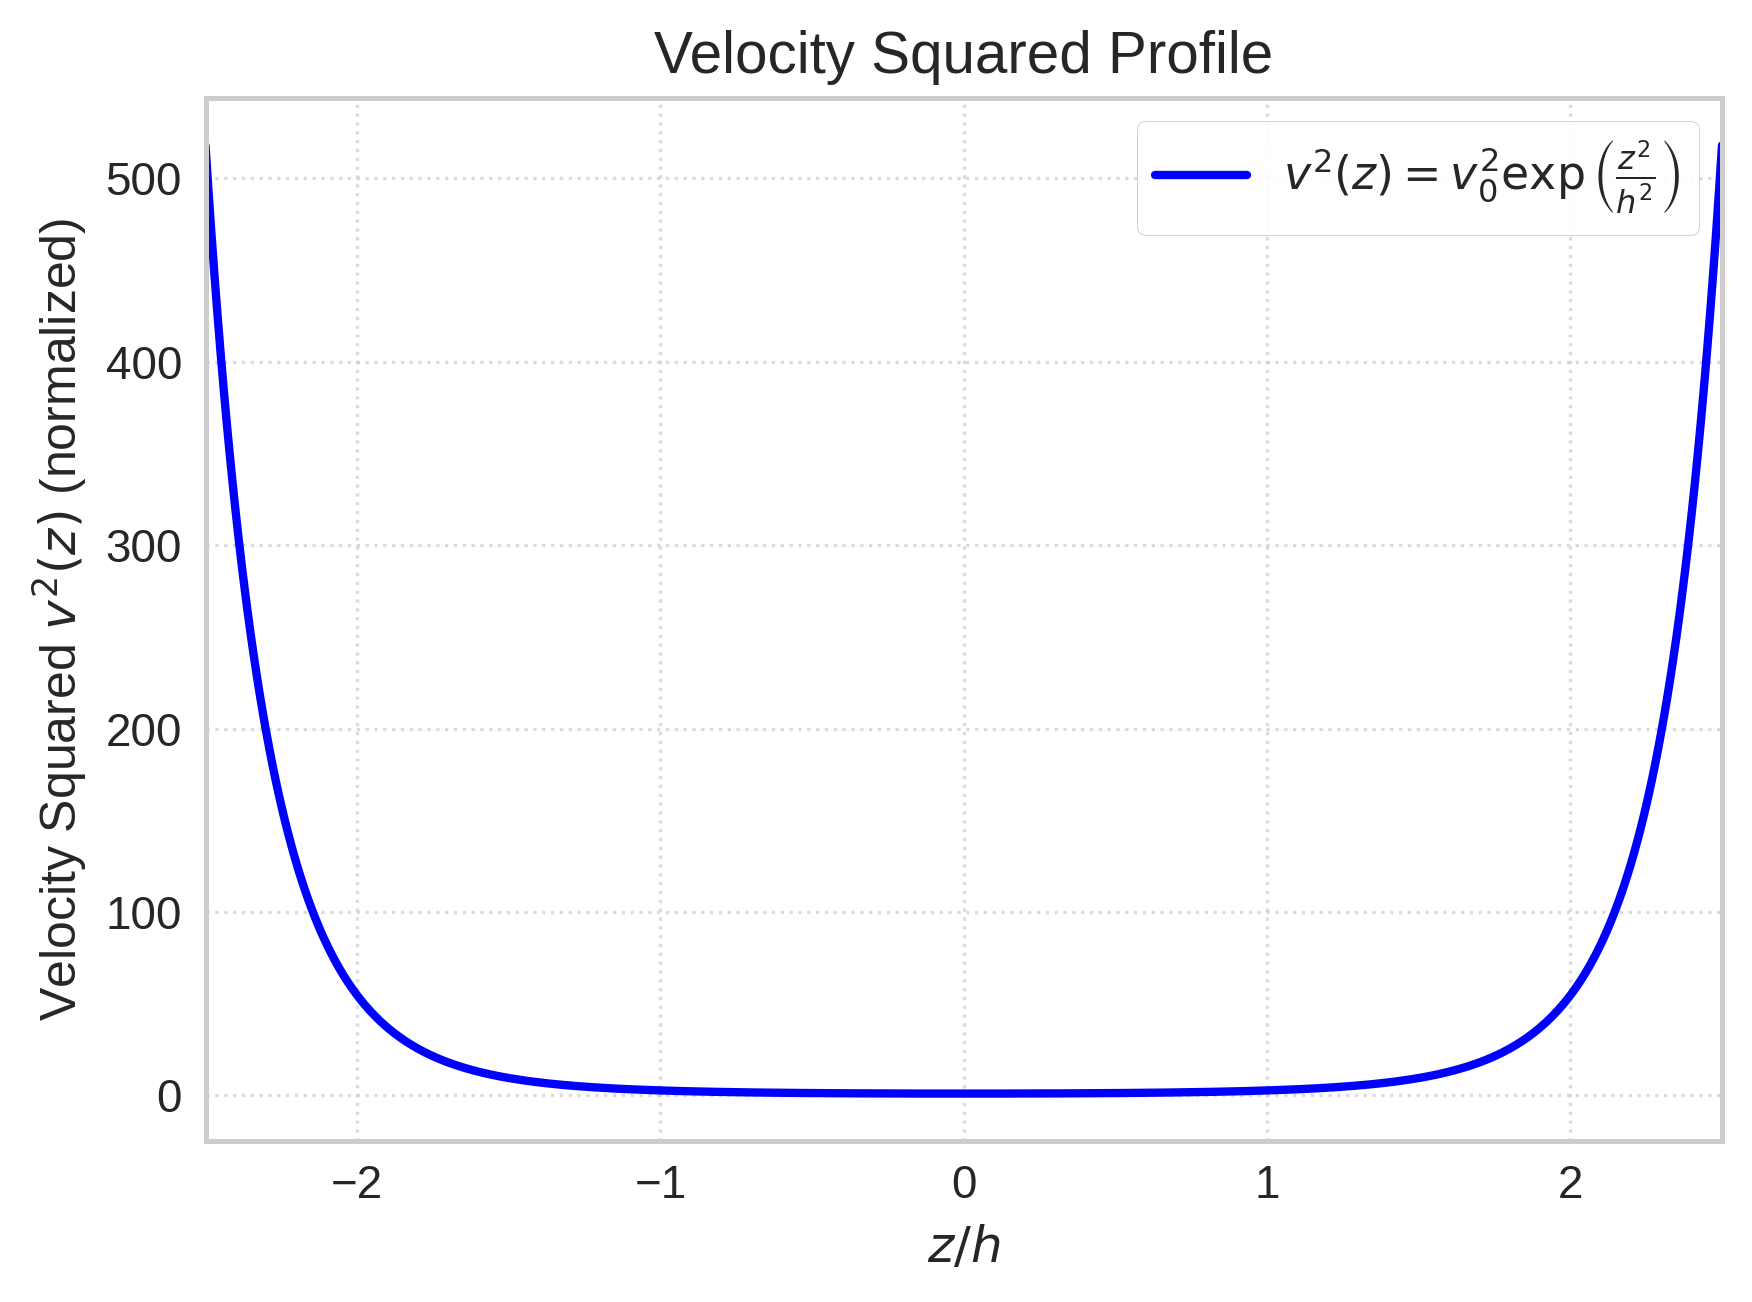

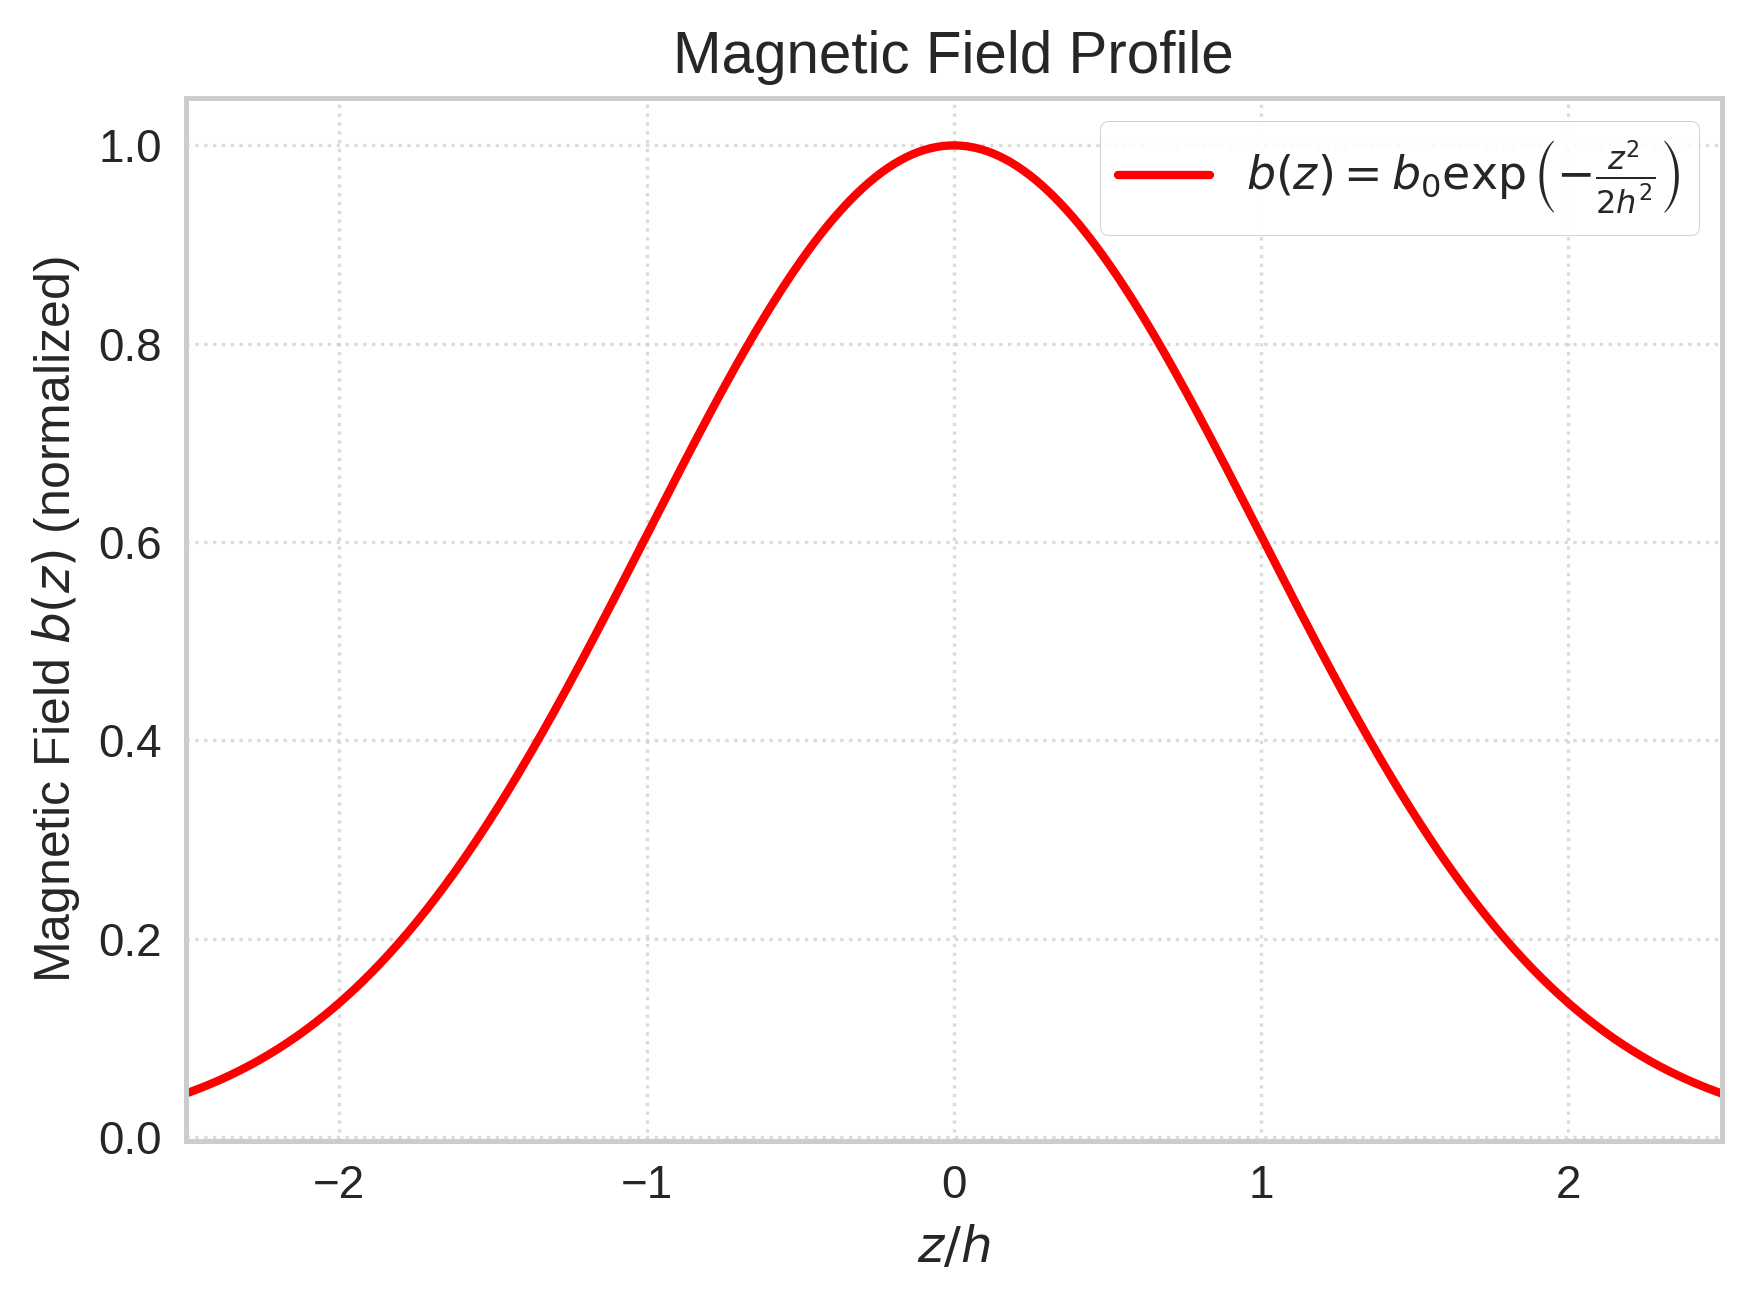

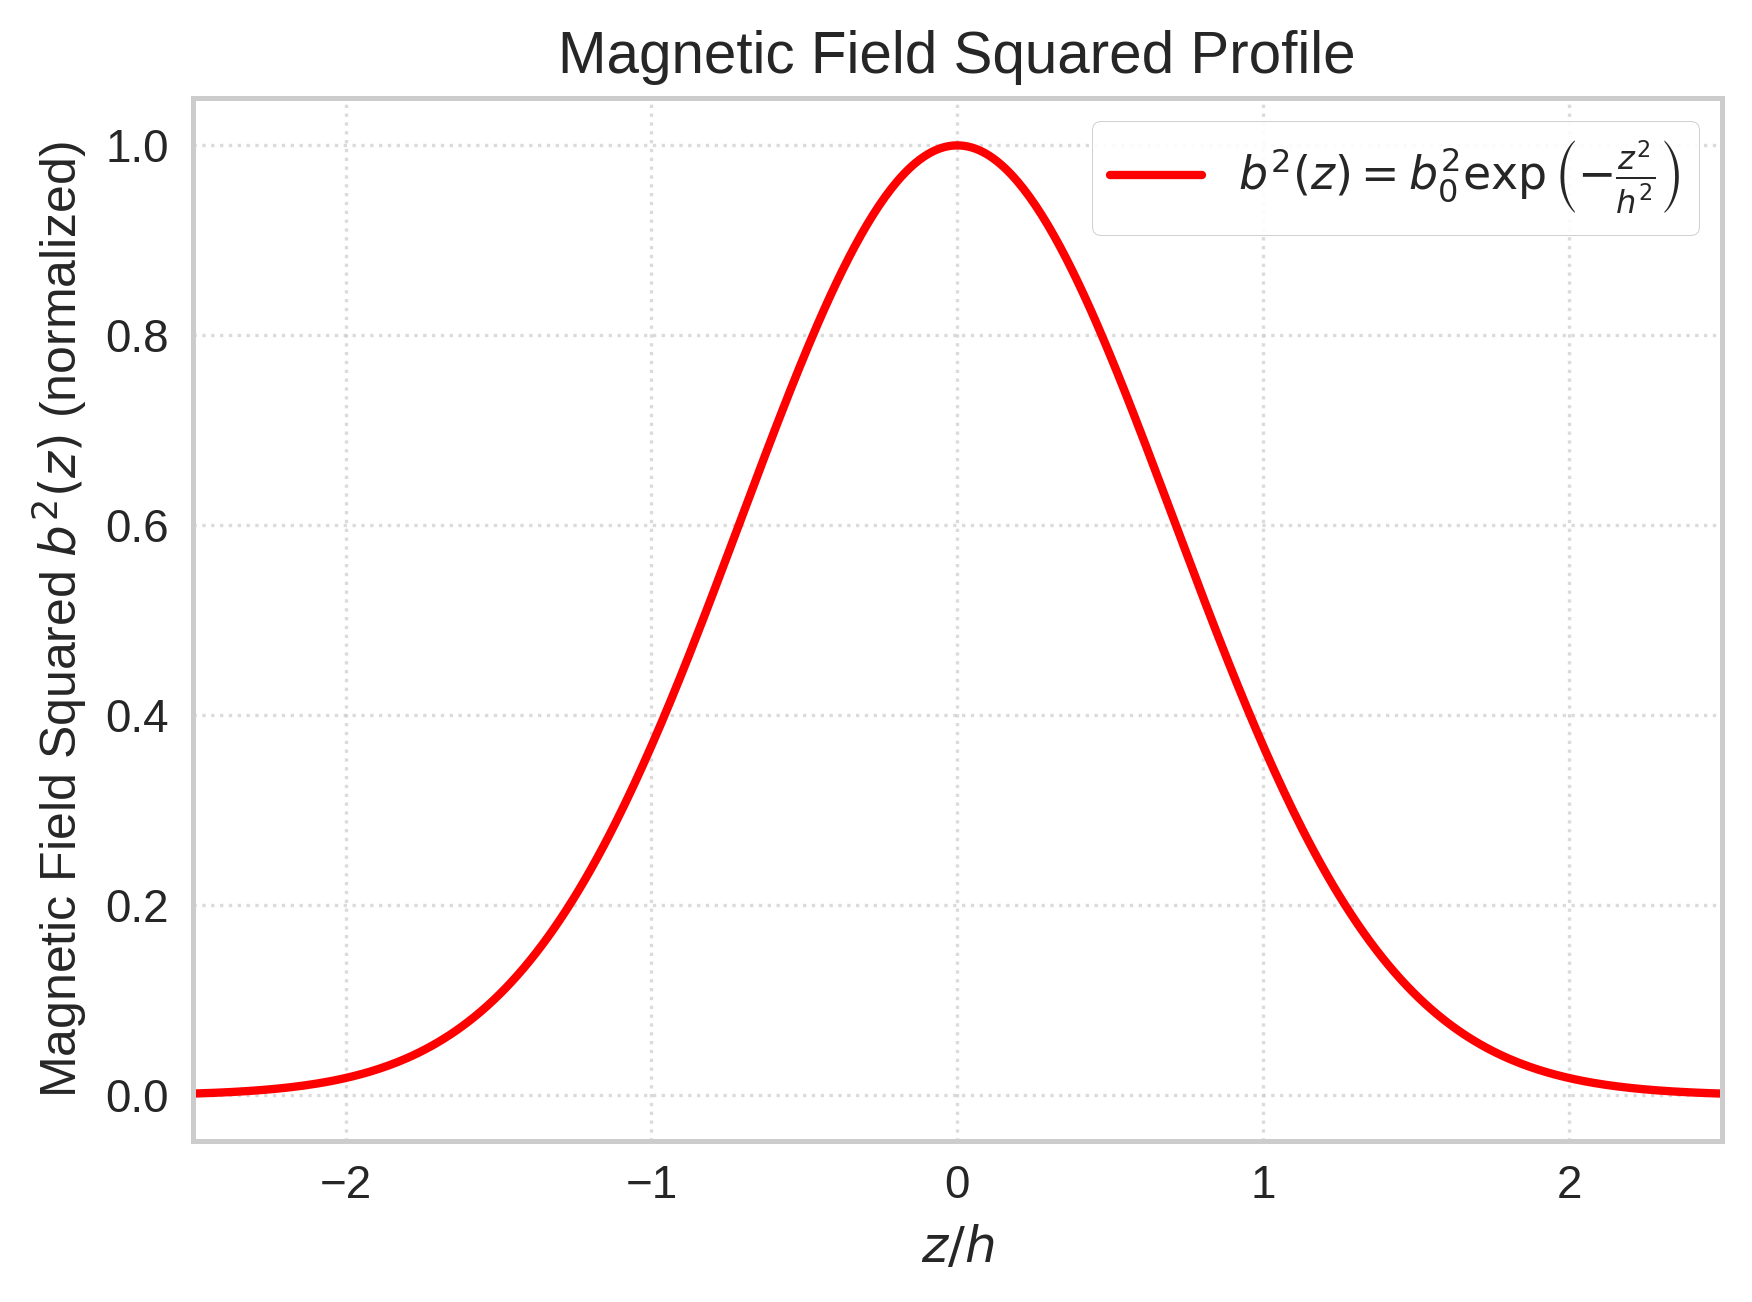

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

# Set up professional plotting parameters
def set_plot_style():
    """Configure matplotlib with professional thesis-style settings"""
    plt.style.use('seaborn-paper')
    # rcParams['font.family'] = 'serif'
    # rcParams['font.serif'] = ['Times New Roman']
    rcParams['font.size'] = 12
    rcParams['axes.labelsize'] = 12
    rcParams['axes.titlesize'] = 14
    rcParams['xtick.labelsize'] = 11
    rcParams['ytick.labelsize'] = 11
    rcParams['legend.fontsize'] = 11
    rcParams['figure.titlesize'] = 14
    rcParams['lines.linewidth'] = 2
    rcParams['axes.linewidth'] = 1.2
    rcParams['xtick.major.width'] = 1.2
    rcParams['ytick.major.width'] = 1.2
    rcParams['xtick.minor.width'] = 0.8
    rcParams['ytick.minor.width'] = 0.8
    rcParams['xtick.direction'] = 'in'
    rcParams['ytick.direction'] = 'in'
    rcParams['figure.dpi'] = 300
    rcParams['savefig.dpi'] = 600
    rcParams['savefig.format'] = 'pdf'
    rcParams['savefig.bbox'] = 'tight'
    rcParams['savefig.pad_inches'] = 0.1

set_plot_style()

# Parameters
v0 = 1.0  # Normalized velocity amplitude
b0 = 1.0  # Normalized magnetic field amplitude
h = 1.0   # Scale height
z_max = 2.5  # Maximum z value
n_points = 500  # Number of points for smooth curves

# Create the z-axis
z = np.linspace(-z_max, z_max, n_points)

# Calculate the profiles
v_squared = v0**2 * np.exp(z**2 / h**2)
b_squared = b0**2 * np.exp(-z**2 / h**2)
v = np.sqrt(v_squared)
b = np.sqrt(b_squared)

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4.5), sharey=True)

# Plot velocity profiles
ax1.plot(z, v, 'b-', label=r'$v(z)$')
ax1.plot(z, v_squared, 'b--', label=r'$v^2(z)$')
ax1.set_xlabel(r'$z/h$', fontsize=12)
ax1.set_ylabel(r'Velocity (normalized)', fontsize=12)
ax1.set_title('Velocity Profiles', fontsize=14)
ax1.legend(frameon=True, framealpha=0.9)
ax1.grid(True, linestyle=':', alpha=0.7)
ax1.set_xlim(-z_max, z_max)

# Plot magnetic field profiles
ax2.plot(z, b, 'r-', label=r'$b(z)$')
ax2.plot(z, b_squared, 'r--', label=r'$b^2(z)$')
ax2.set_xlabel(r'$z/h$', fontsize=12)
ax2.set_ylabel(r'Magnetic Field (normalized)', fontsize=12)
ax2.set_title('Magnetic Field Profiles', fontsize=14)
ax2.legend(frameon=True, framealpha=0.9)
ax2.grid(True, linestyle=':', alpha=0.7)
ax2.set_xlim(-z_max, z_max)

# Adjust layout and save
plt.tight_layout()
plt.savefig('velocity_magnetic_profiles.pdf')
plt.savefig('velocity_magnetic_profiles.png', dpi=600)
plt.show()

# Create individual plots for each quantity
# Velocity profile only
plt.figure(figsize=(6, 4.5))
plt.plot(z, v, 'b-', linewidth=2, label=r'$v(z) = v_0 \exp\left(\frac{z^2}{2h^2}\right)$')
plt.xlabel(r'$z/h$', fontsize=12)
plt.ylabel(r'Velocity $v(z)$ (normalized)', fontsize=12)
plt.title('Velocity Profile', fontsize=14)
plt.legend(frameon=True, framealpha=0.9)
plt.grid(True, linestyle=':', alpha=0.7)
plt.xlim(-z_max, z_max)
plt.tight_layout()
plt.savefig('velocity_profile.pdf')
plt.savefig('velocity_profile.png', dpi=600)
plt.show()

# Velocity squared profile
plt.figure(figsize=(6, 4.5))
plt.plot(z, v_squared, 'b-', linewidth=2, 
         label=r'$v^2(z) = v_0^2 \exp\left(\frac{z^2}{h^2}\right)$')
plt.xlabel(r'$z/h$', fontsize=12)
plt.ylabel(r'Velocity Squared $v^2(z)$ (normalized)', fontsize=12)
plt.title('Velocity Squared Profile', fontsize=14)
plt.legend(frameon=True, framealpha=0.9)
plt.grid(True, linestyle=':', alpha=0.7)
plt.xlim(-z_max, z_max)
plt.tight_layout()
plt.savefig('velocity_squared_profile.pdf')
plt.savefig('velocity_squared_profile.png', dpi=600)
plt.show()

# Magnetic field profile
plt.figure(figsize=(6, 4.5))
plt.plot(z, b, 'r-', linewidth=2, 
         label=r'$b(z) = b_0 \exp\left(-\frac{z^2}{2h^2}\right)$')
plt.xlabel(r'$z/h$', fontsize=12)
plt.ylabel(r'Magnetic Field $b(z)$ (normalized)', fontsize=12)
plt.title('Magnetic Field Profile', fontsize=14)
plt.legend(frameon=True, framealpha=0.9)
plt.grid(True, linestyle=':', alpha=0.7)
plt.xlim(-z_max, z_max)
plt.tight_layout()
plt.savefig('magnetic_profile.pdf')
plt.savefig('magnetic_profile.png', dpi=600)
plt.show()

# Magnetic field squared profile
plt.figure(figsize=(6, 4.5))
plt.plot(z, b_squared, 'r-', linewidth=2, 
         label=r'$b^2(z) = b_0^2 \exp\left(-\frac{z^2}{h^2}\right)$')
plt.xlabel(r'$z/h$', fontsize=12)
plt.ylabel(r'Magnetic Field Squared $b^2(z)$ (normalized)', fontsize=12)
plt.title('Magnetic Field Squared Profile', fontsize=14)
plt.legend(frameon=True, framealpha=0.9)
plt.grid(True, linestyle=':', alpha=0.7)
plt.xlim(-z_max, z_max)
plt.tight_layout()
plt.savefig('magnetic_squared_profile.pdf')
plt.savefig('magnetic_squared_profile.png', dpi=600)
plt.show()


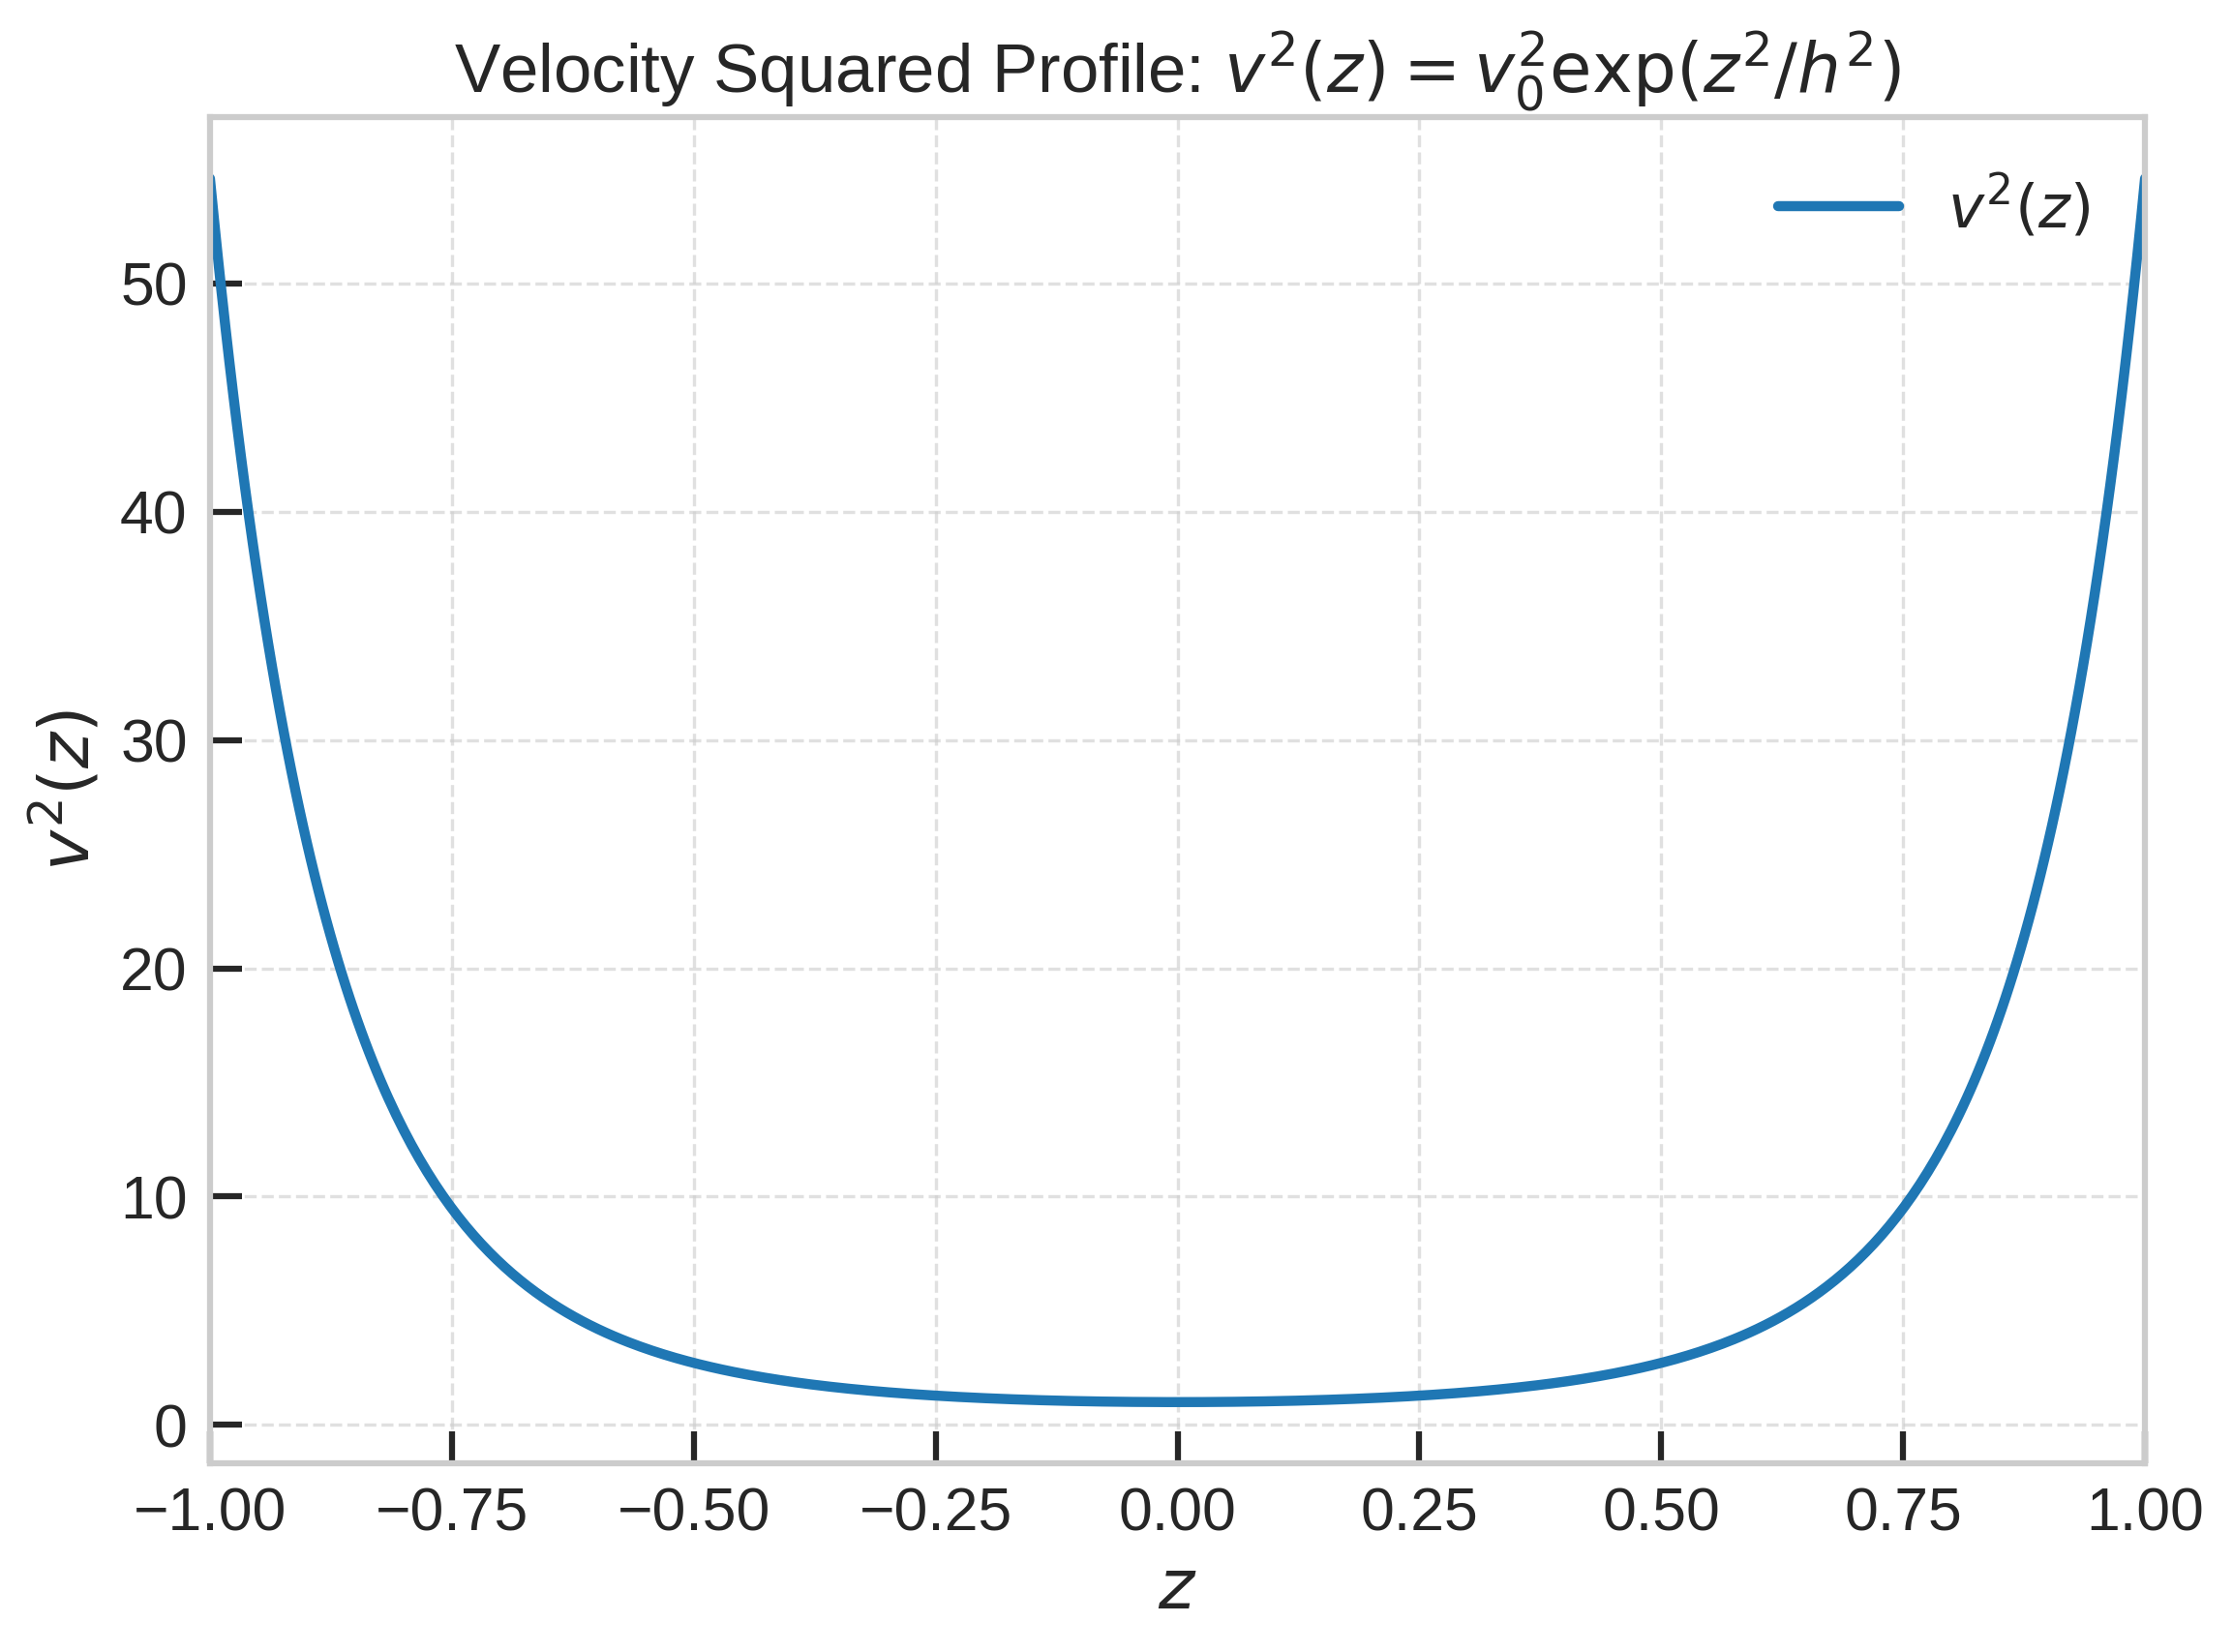

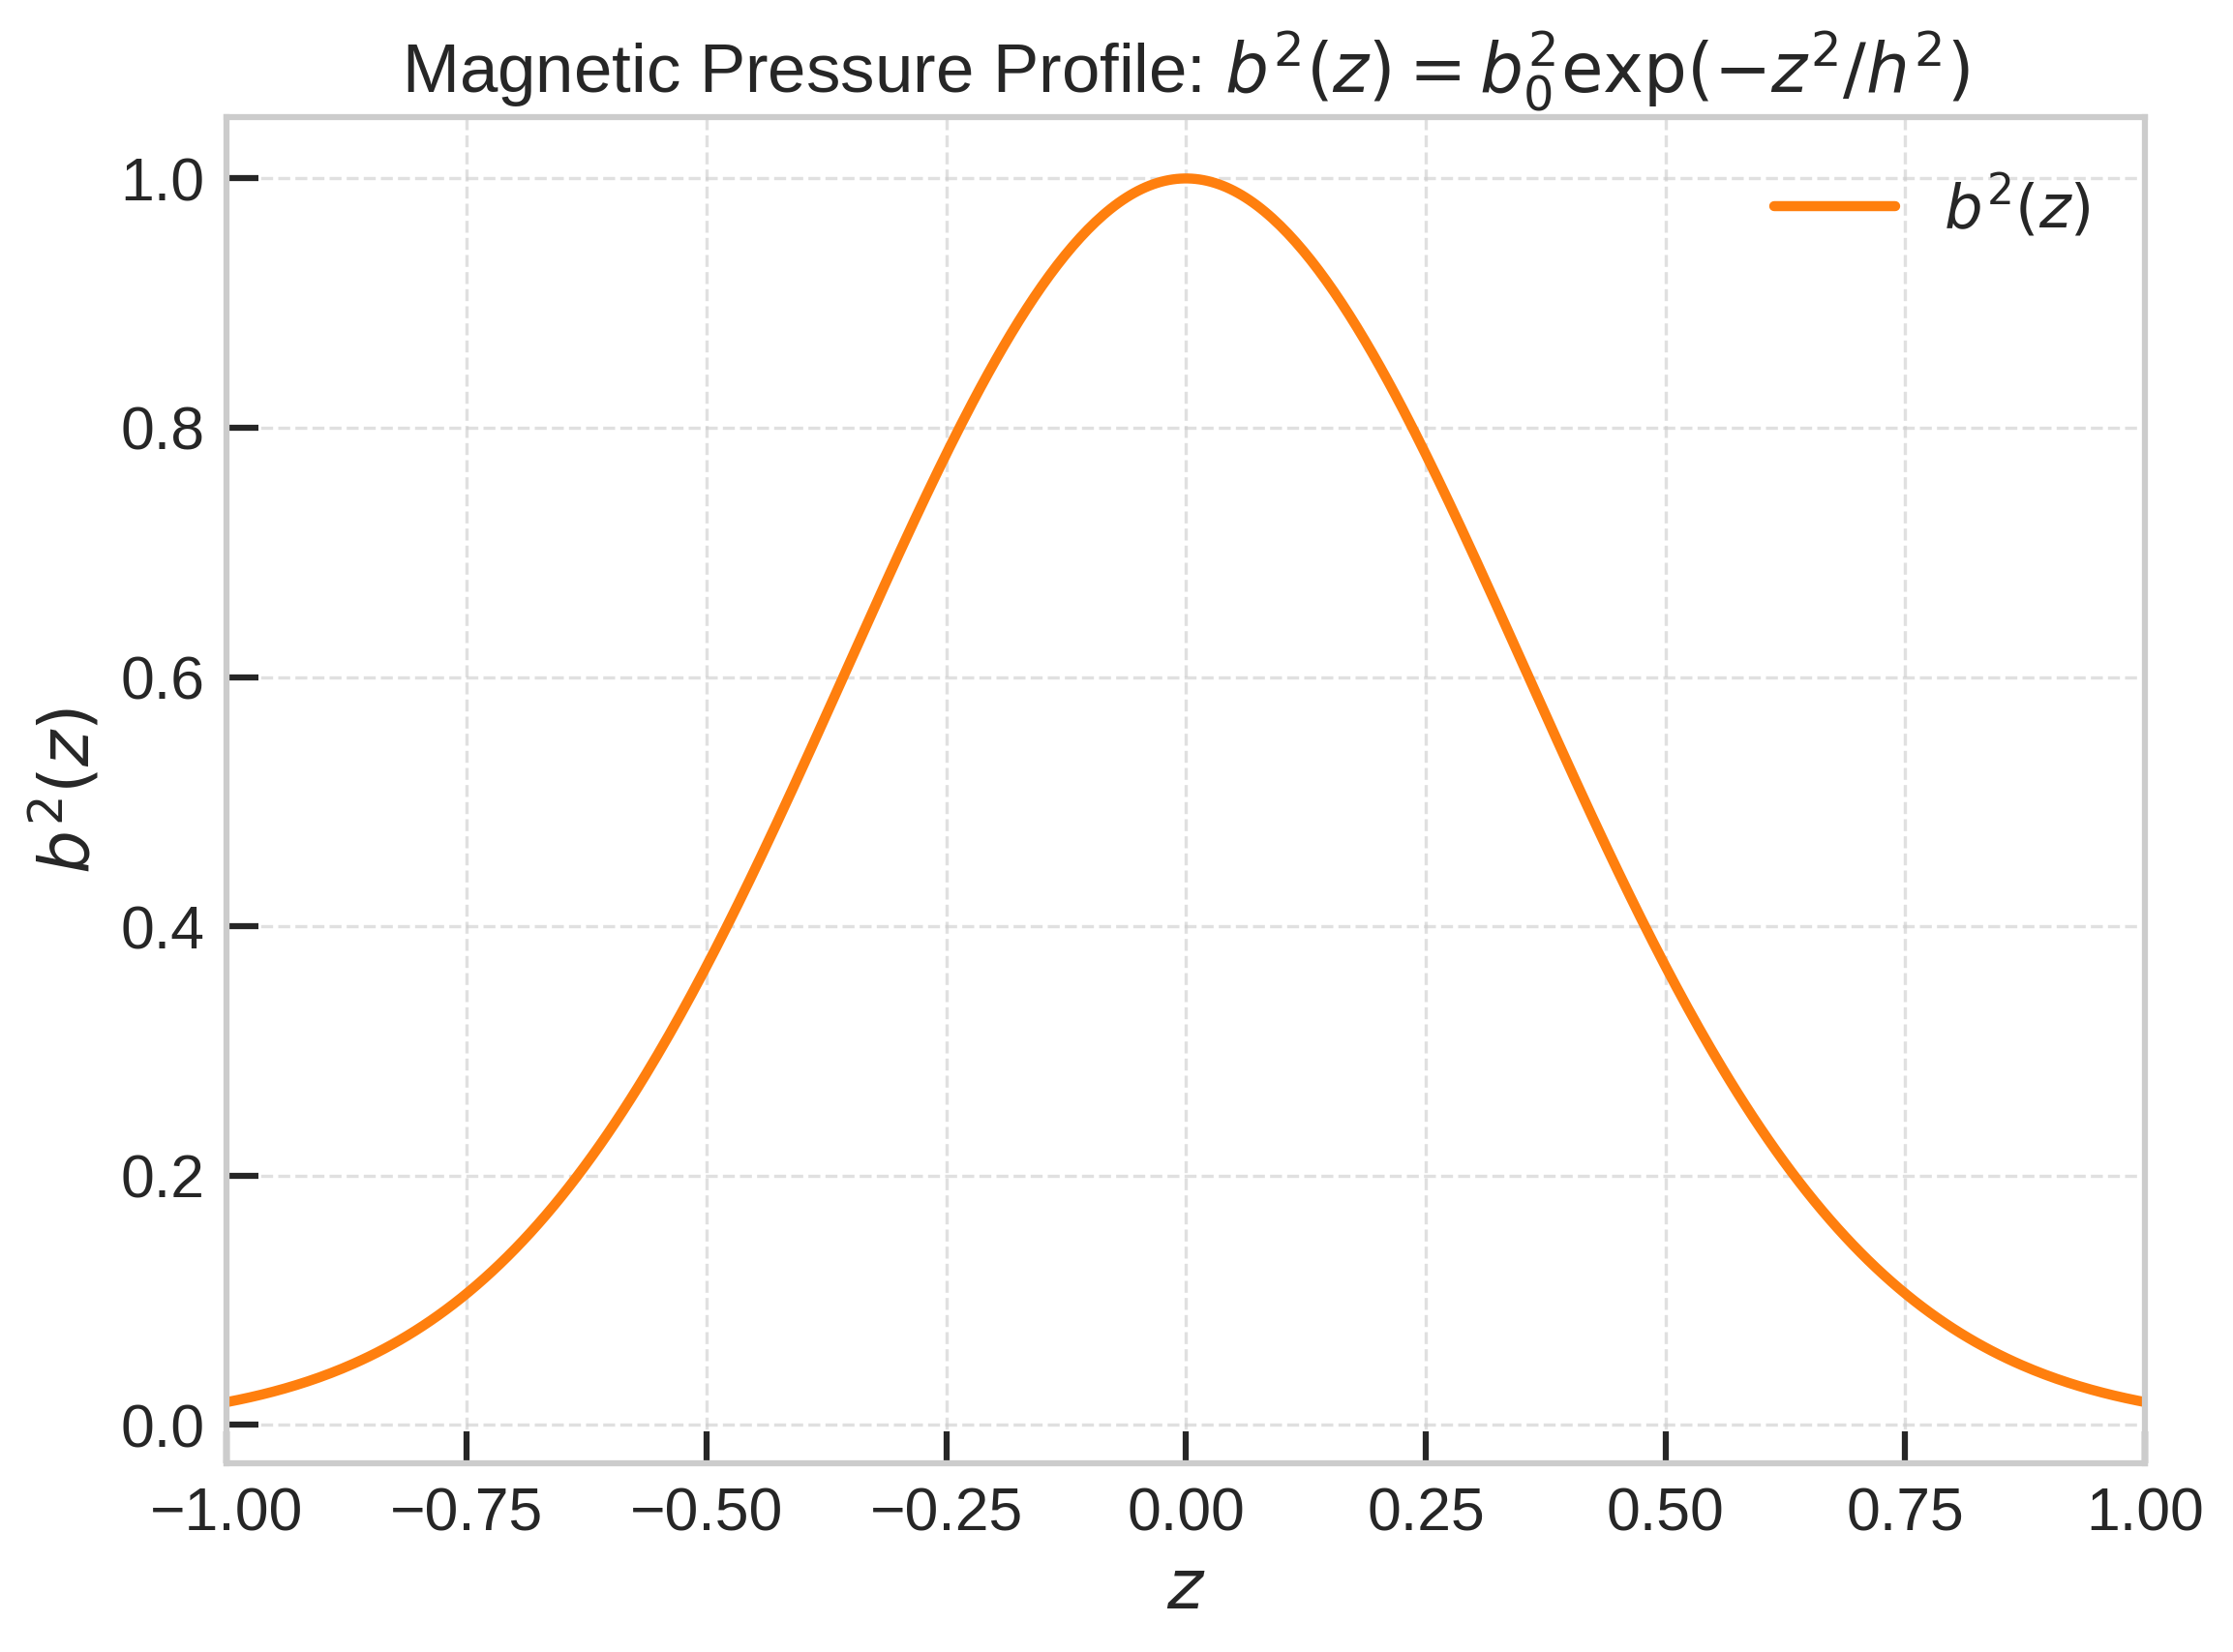

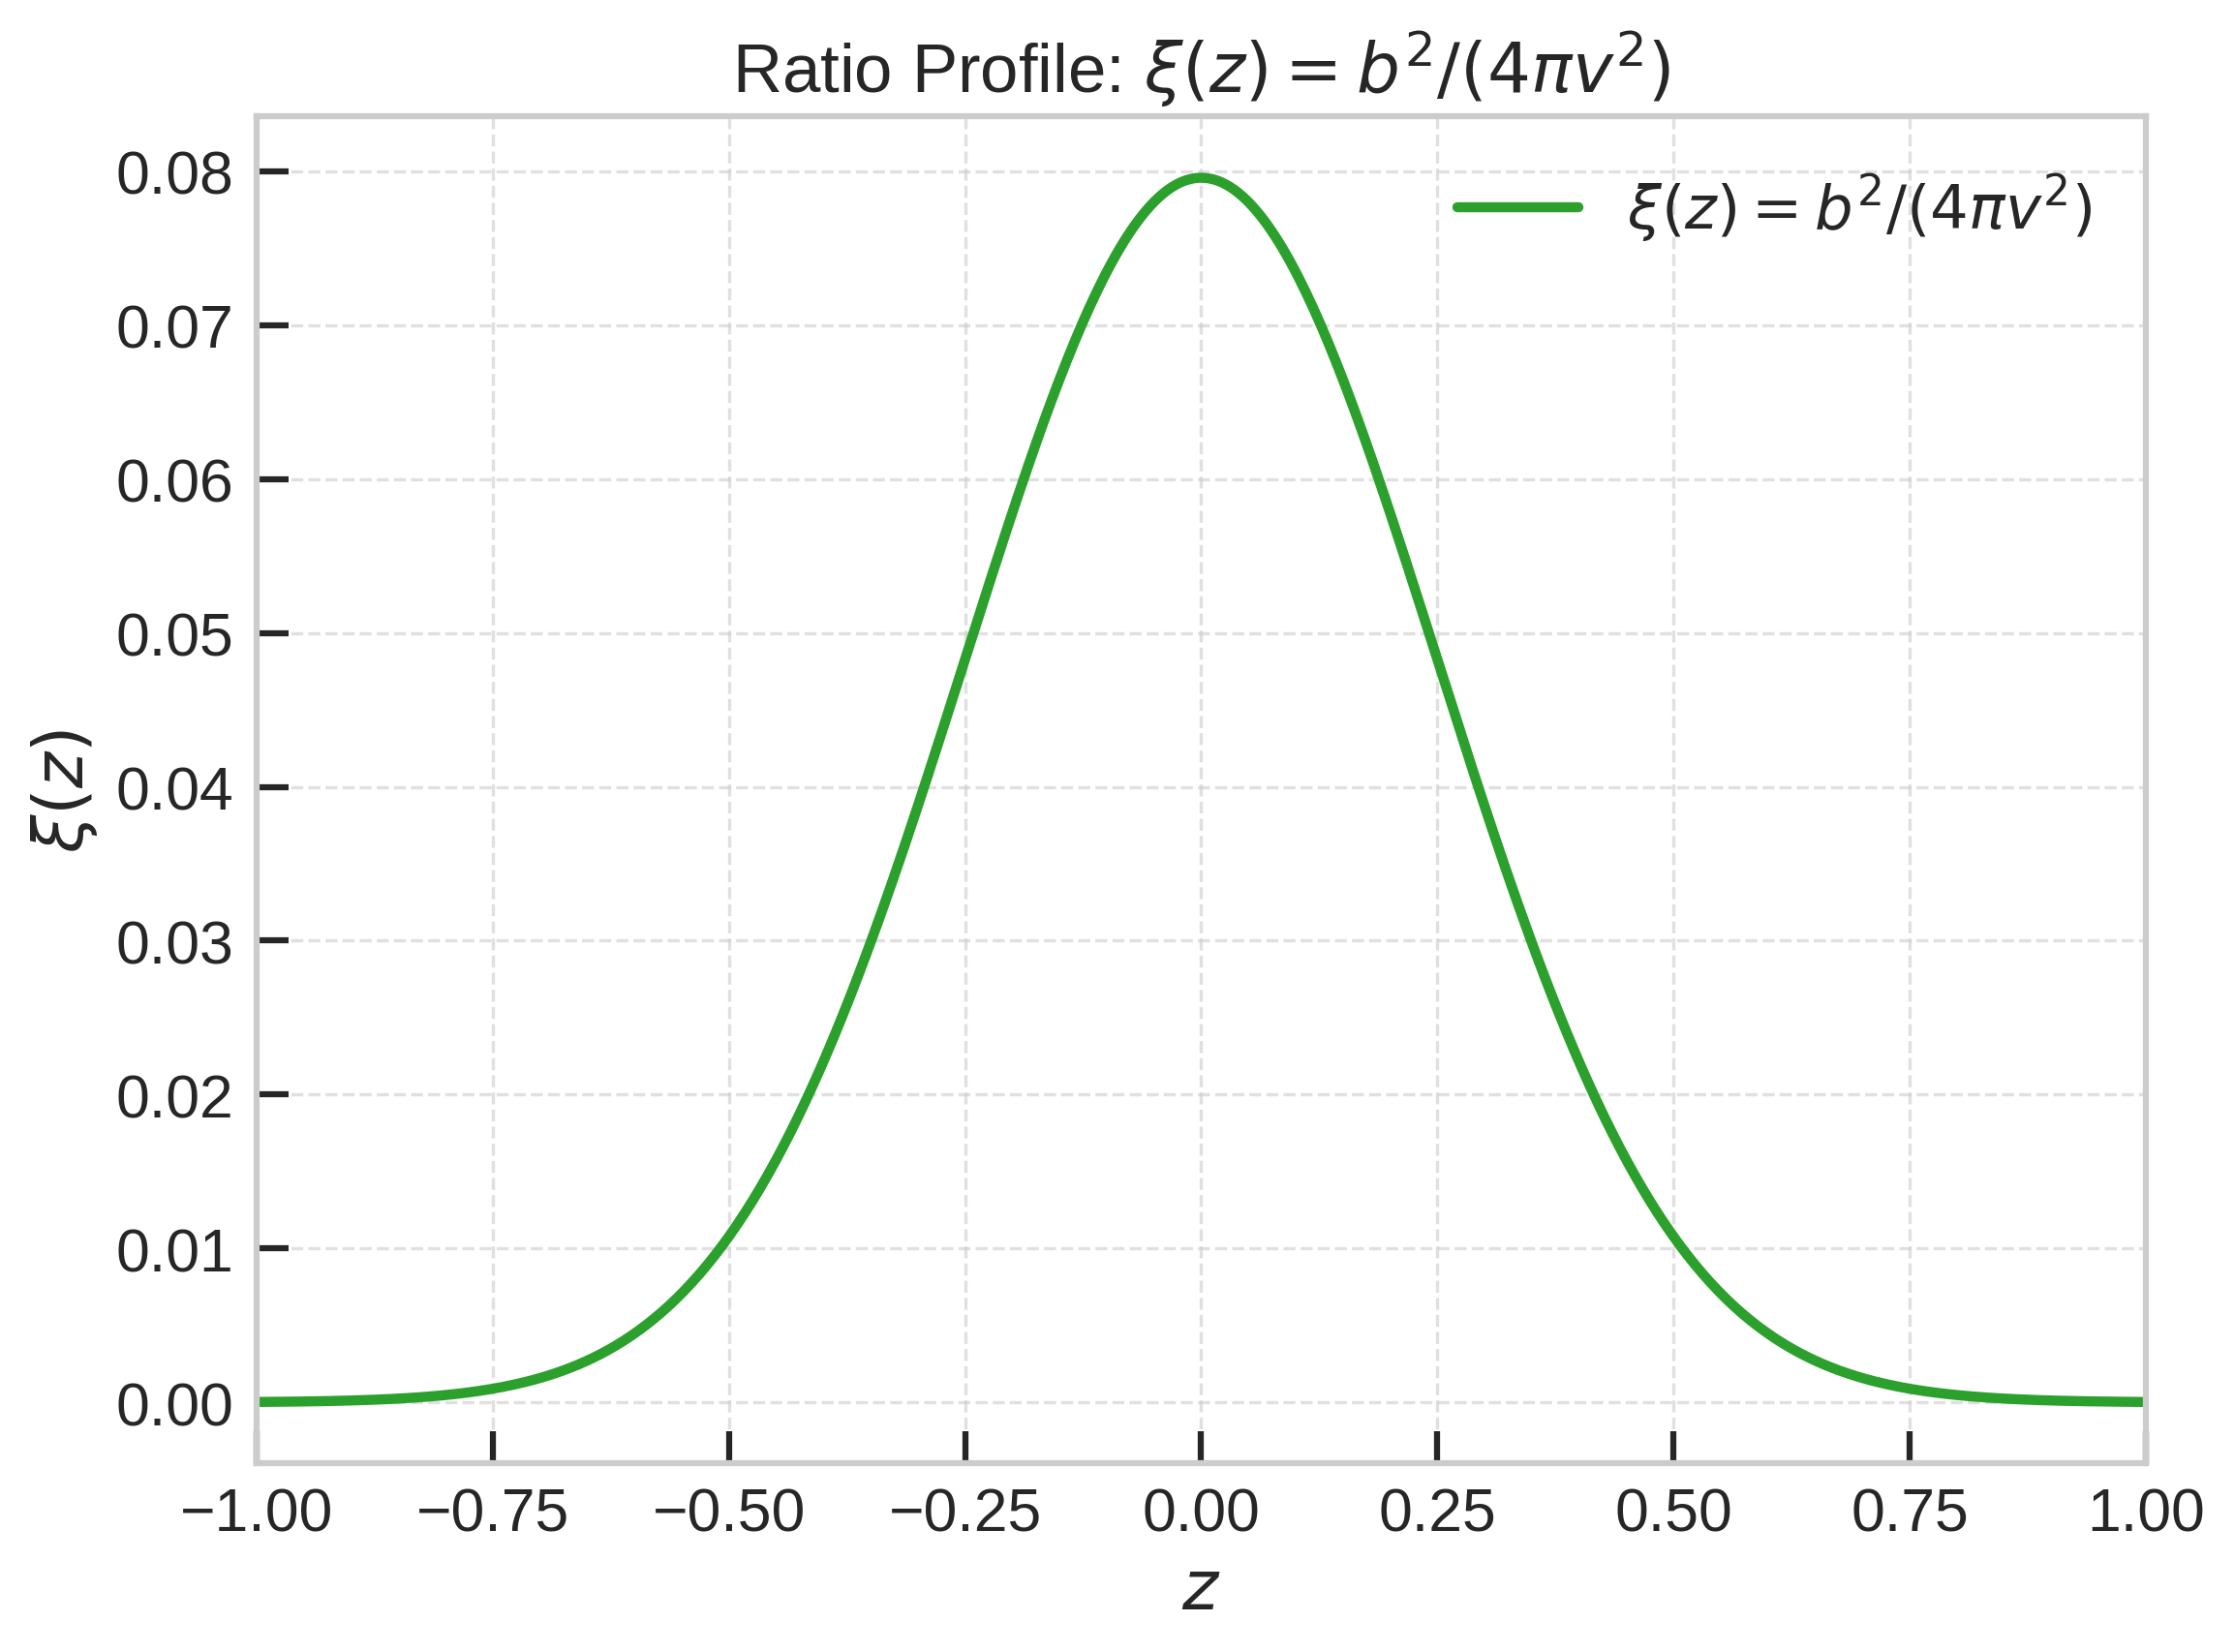

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

# Set parameters
h = 0.5
z = np.linspace(-1, 1, 500)  # z from -1 to 1
v0 = 1.0  # Arbitrary normalization
b0 = 1.0  # Arbitrary normalization

# Calculate profiles
v_squared = v0**2 * np.exp(z**2 / h**2)
b_squared = b0**2 * np.exp(-z**2 / h**2)
xi = b_squared / (4 * np.pi * v_squared)

# Set up global plot parameters
rcParams['font.size'] = 17
# rcParams['font.family'] = 'serif'
rcParams['axes.labelsize'] = 17
rcParams['axes.titlesize'] = 17
rcParams['xtick.labelsize'] = 15
rcParams['ytick.labelsize'] = 15
rcParams['legend.fontsize'] = 15
rcParams['axes.linewidth'] = 1.5
rcParams['lines.linewidth'] = 2.5
rcParams['xtick.major.size'] = 8
rcParams['xtick.major.width'] = 1.5
rcParams['ytick.major.size'] = 8
rcParams['ytick.major.width'] = 1.5

# Create figure with appropriate size
fig_width = 8  # inches
fig_height = 6  # inches

# Plot v²(z) profile
plt.figure(figsize=(fig_width, fig_height))
plt.plot(z, v_squared, color='#1f77b4', label=r'$v^2(z)$')
plt.xlabel(r'$z$', fontsize=17)
plt.ylabel(r'$v^2(z)$', fontsize=17)
plt.title(r'Velocity Squared Profile: $v^2(z) = v_0^2 \exp(z^2/h^2)$', fontsize=17)
plt.xlim(-1, 1)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

# Plot b²(z) profile
plt.figure(figsize=(fig_width, fig_height))
plt.plot(z, b_squared, color='#ff7f0e', label=r'$b^2(z)$')
plt.xlabel(r'$z$', fontsize=17)
plt.ylabel(r'$b^2(z)$', fontsize=17)
plt.title(r'Magnetic Pressure Profile: $b^2(z) = b_0^2 \exp(-z^2/h^2)$', fontsize=17)
plt.xlim(-1, 1)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

# Plot ξ(z) profile
plt.figure(figsize=(fig_width, fig_height))
plt.plot(z, xi, color='#2ca02c', label=r'$\xi(z) = b^2/(4\pi v^2)$')
plt.xlabel(r'$z$', fontsize=17)
plt.ylabel(r'$\xi(z)$', fontsize=17)
plt.title(r'Ratio Profile: $\xi(z) = b^2/(4\pi v^2)$', fontsize=17)
plt.xlim(-1, 1)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define the Gaussian function with a fixed sigma of 0.4 (as in your original)
def gaussian(z, A, mu):
    sigma = 0.4  # Fixed width parameter
    return A * np.exp(-((z - mu) ** 2) / (2 * sigma ** 2))

# Create mask for the region of interest (-0.5 to 0.5 kpc)
mask = (Z[0, :] > -0.5) & (Z[0, :] < 0.5)
Z_masked = Z[0, :][mask]
Urms_masked = Urms_mean[mask]

# Estimate initial parameters
A0 = np.max(Urms_masked)  # Peak amplitude
mu0 = np.mean(Z_masked)   # Center position

# Fit the Gaussian to the masked data
try:
    popt, pcov = curve_fit(gaussian, Z_masked, Urms_masked, 
                          p0=[A0, mu0], 
                          maxfev=10000)
    
    A_fit, mu_fit = popt
    sigma_fit = 0.4  # Fixed value
    
    print(f"Fit parameters:\nAmplitude (A) = {A_fit:.4f}\nCenter (μ) = {mu_fit:.4f}\nFixed σ = {sigma_fit:.1f}")

    # Create figure with enhanced styling
    plt.figure(figsize=(8, 5), facecolor='white')
    plt.style.use('seaborn-v0_8-poster')
    
    # Plot data and fit
    plt.plot(Z[0, :], Urms_mean, 'o', color='#3498db', 
            markersize=6, alpha=0.7, label='Data')
    plt.plot(Z_masked, gaussian(Z_masked, A_fit, mu_fit), 
            color='#e74c3c', linewidth=2.5, label='Gaussian Fit')
    
    # Highlight the fitted region
    plt.axvspan(-0.5, 0.5, color='gray', alpha=0.1, label='Fitted Region')
    plt.axvline(x=-0.5, color='#2c3e50', linestyle='--', alpha=0.7)
    plt.axvline(x=0.5, color='#2c3e50', linestyle='--', alpha=0.7)
    
    # Add annotations
    plt.text(0.02, 0.95, f'A = {A_fit:.2f}\nμ = {mu_fit:.2f}\nσ = {sigma_fit:.1f} (fixed)',
             transform=plt.gca().transAxes,
             bbox=dict(facecolor='white', alpha=0.8),
             verticalalignment='top')
    
    # Labels and title
    plt.xlabel('Z (kpc)', fontsize=14)
    plt.ylabel('$u_{rms}$ (cm/s)', fontsize=14)
    plt.title('Vertical Profile of Turbulent Velocity with Gaussian Fit', fontsize=16, pad=20)
    
    # Grid and legend
    plt.grid(True, linestyle='--', alpha=0.4)
    plt.legend(fontsize=12, framealpha=1)
    
    plt.tight_layout()
    plt.savefig('urms_gaussian_fit.png', dpi=300, bbox_inches='tight')
    plt.show()

except Exception as e:
    print(f"Fitting failed: {str(e)}")
    plt.figure(figsize=(8, 5))
    plt.plot(Z[0, :], Urms_mean, 'o-', label='Data')
    plt.xlabel('Z (kpc)')
    plt.ylabel('$u_{rms}$ (cm/s)')
    plt.title('Data (Fit Failed)')
    plt.show


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed